In [4]:
import numpy as np

from sklearn.model_selection import train_test_split, GroupKFold
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, precision_score, average_precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling1D, MaxPooling2D, LeakyReLU
from keras.initializers import RandomNormal
import keras.optimizers as opt
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import plot_model
from keras.regularizers import l2

In [5]:
data = np.load('../data/data.npy')
meta = np.load('../data/meta.npy')
print(f'data = {data.shape}')
print(f'meta = {meta.shape}')

data = (1845, 21, 77)
meta = (1845, 3)


In [6]:
X = data[:,:,:,np.newaxis]
Y = meta[:,2][:,np.newaxis].astype(int)

In [7]:
shape = X.shape
std = StandardScaler().fit(X.reshape(-1,1))
X = std.transform(X.reshape(-1,1)).reshape(shape)

In [8]:
G = meta[:,0]
print(G.shape, len(np.unique(G)))

(1845,) 17


In [9]:
X,Y,G = shuffle(X,Y,G)

In [10]:
gfold = GroupKFold(n_splits = len(np.unique(G)))

In [ ]:
def get_model(cnn_input, cnn_output, l2_lambda = 0.1, drop_rate = 0.75):
    
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation = 'tanh', name = 'conv1', input_shape = cnn_input))
                    #,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    model.add(MaxPooling2D(pool_size = (2,2), name='maxpool1'))

    model.add(Conv2D(16, (3,3), activation = 'tanh', name = 'conv1', input_shape = cnn_input))
                    #,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    model.add(MaxPooling2D(pool_size = (2,2), name='maxpool1'))

#     model.add(Dropout(drop_rate, name='drop1'))
    
#     model.add(Conv2D(32, (5,5), activation='tanh', name='conv2'
#                     ,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool2'))

#     model.add(Dropout(drop_rate, name='drop2'))
    
#     model.add(Conv2D(64, (3,3), activation='tanh', name='conv3'
#                     ,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    #model.add(MaxPooling2D(pool_size=(2,2), strides = (1,1), name='maxpool3'))

    model.add(Dropout(drop_rate, name='drop3'))
              
    model.add(Flatten(name='flat4'))
    model.add(Dropout(drop_rate, name='drop4'))
    model.add(Dense(1024, activation='tanh', name='dense4'))

    model.add(Dropout(drop_rate, name='drop5'))
              
    model.add(Dense(cnn_output, activation='sigmoid', name='softmax'))
    
    return model

In [116]:
cnn_input = X.shape[1:]
cnn_output = Y.shape[1]
batch_size = 32

print(f"cnn_input  = {cnn_input}")
print(f"cnn_output = {cnn_output}")
print(f"batch_size = {batch_size}")

get_model(cnn_input, cnn_output).summary()

cnn_input  = (21, 77, 1)
cnn_output = 1
batch_size = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 19, 75, 32)        320       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 9, 37, 32)         0         
_________________________________________________________________
drop3 (Dropout)              (None, 9, 37, 32)         0         
_________________________________________________________________
flat4 (Flatten)              (None, 10656)             0         
_________________________________________________________________
drop4 (Dropout)              (None, 10656)             0         
_________________________________________________________________
dense4 (Dense)               (None, 1024)              10912768  
_________________________________________________________________
drop5 (Dropout)     

In [117]:
results = np.append(Y, np.zeros_like(Y), axis = 1)
results = np.append(results, np.zeros_like(Y), axis = 1).astype(float)
results.shape

(1845, 3)

PID: 1.0 TRAIN: 1519 TEST: 326
train: x=(1139, 21, 77, 1) y=(1139, 1)
valid: x=(380, 21, 77, 1) y=(380, 1)
test : x=(326, 21, 77, 1)  y=(326, 1)
Train on 1139 samples, validate on 380 samples
Epoch 1/1000
 - 8s - loss: 0.8698 - acc: 0.5312 - val_loss: 0.6665 - val_acc: 0.6237
Epoch 2/1000
 - 0s - loss: 0.8472 - acc: 0.5452 - val_loss: 0.6642 - val_acc: 0.6342
Epoch 3/1000
 - 0s - loss: 0.7972 - acc: 0.5759 - val_loss: 0.6673 - val_acc: 0.6342
Epoch 4/1000
 - 1s - loss: 0.8131 - acc: 0.5680 - val_loss: 0.6650 - val_acc: 0.6395
Epoch 5/1000
 - 1s - loss: 0.7900 - acc: 0.5680 - val_loss: 0.6557 - val_acc: 0.6395
Epoch 6/1000
 - 1s - loss: 0.7784 - acc: 0.5847 - val_loss: 0.6495 - val_acc: 0.6447
Epoch 7/1000
 - 1s - loss: 0.7685 - acc: 0.6067 - val_loss: 0.6432 - val_acc: 0.6526
Epoch 8/1000
 - 1s - loss: 0.7277 - acc: 0.5944 - val_loss: 0.6383 - val_acc: 0.6474
Epoch 9/1000
 - 1s - loss: 0.7617 - acc: 0.5891 - val_loss: 0.6288 - val_acc: 0.6474
Epoch 10/1000
 - 1s - loss: 0.7400 - acc: 0

 - 1s - loss: 0.4729 - acc: 0.7788 - val_loss: 0.4159 - val_acc: 0.8132
Epoch 95/1000
 - 1s - loss: 0.4592 - acc: 0.7621 - val_loss: 0.4149 - val_acc: 0.8053
Epoch 96/1000
 - 1s - loss: 0.4559 - acc: 0.7682 - val_loss: 0.4158 - val_acc: 0.7974
Epoch 97/1000
 - 1s - loss: 0.4586 - acc: 0.7647 - val_loss: 0.4193 - val_acc: 0.8026
Epoch 98/1000
 - 1s - loss: 0.4593 - acc: 0.7700 - val_loss: 0.4113 - val_acc: 0.8053
Epoch 99/1000
 - 1s - loss: 0.4649 - acc: 0.7550 - val_loss: 0.4191 - val_acc: 0.7921
Epoch 100/1000
 - 1s - loss: 0.4687 - acc: 0.7717 - val_loss: 0.4091 - val_acc: 0.8079
Epoch 101/1000
 - 1s - loss: 0.4605 - acc: 0.7779 - val_loss: 0.4089 - val_acc: 0.7974
Epoch 102/1000
 - 1s - loss: 0.4572 - acc: 0.7577 - val_loss: 0.4025 - val_acc: 0.8211
Epoch 103/1000
 - 1s - loss: 0.4408 - acc: 0.7902 - val_loss: 0.4195 - val_acc: 0.7737
Epoch 104/1000
 - 1s - loss: 0.4495 - acc: 0.7910 - val_loss: 0.4185 - val_acc: 0.7842
Epoch 105/1000
 - 1s - loss: 0.4504 - acc: 0.7752 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3390 - acc: 0.8727 - val_loss: 0.3051 - val_acc: 0.9105
Epoch 190/1000
 - 1s - loss: 0.3385 - acc: 0.8701 - val_loss: 0.2918 - val_acc: 0.9289
Epoch 191/1000
 - 1s - loss: 0.3287 - acc: 0.8674 - val_loss: 0.2894 - val_acc: 0.9289
Epoch 192/1000
 - 1s - loss: 0.3260 - acc: 0.8683 - val_loss: 0.2969 - val_acc: 0.9000
Epoch 193/1000
 - 1s - loss: 0.3324 - acc: 0.8727 - val_loss: 0.2964 - val_acc: 0.9184
Epoch 194/1000
 - 1s - loss: 0.3303 - acc: 0.8718 - val_loss: 0.2766 - val_acc: 0.9500
Epoch 195/1000
 - 1s - loss: 0.3412 - acc: 0.8736 - val_loss: 0.3101 - val_acc: 0.9053
Epoch 196/1000
 - 1s - loss: 0.3406 - acc: 0.8639 - val_loss: 0.2784 - val_acc: 0.9342
Epoch 197/1000
 - 1s - loss: 0.3305 - acc: 0.8718 - val_loss: 0.2763 - val_acc: 0.9395
Epoch 198/1000
 - 1s - loss: 0.3330 - acc: 0.8745 - val_loss: 0.2897 - val_acc: 0.8974
Epoch 199/1000
 - 1s - loss: 0.3329 - acc: 0.8788 - val_loss: 0.3036 - val_acc: 0.9079
Epoch 200/1000
 - 1s - loss: 0.3322 - acc: 

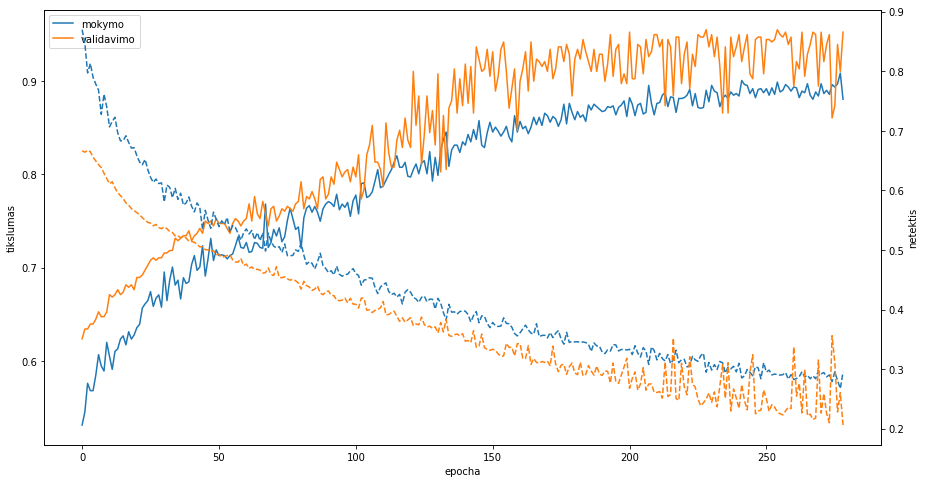

PID: 212.0 TRAIN: 1556 TEST: 289
train: x=(1167, 21, 77, 1) y=(1167, 1)
valid: x=(389, 21, 77, 1) y=(389, 1)
test : x=(289, 21, 77, 1)  y=(289, 1)
Train on 1167 samples, validate on 389 samples
Epoch 1/1000
 - 8s - loss: 0.8414 - acc: 0.5356 - val_loss: 0.4883 - val_acc: 0.8380
Epoch 2/1000
 - 0s - loss: 0.6449 - acc: 0.6598 - val_loss: 0.4434 - val_acc: 0.8380
Epoch 3/1000
 - 1s - loss: 0.5794 - acc: 0.7258 - val_loss: 0.4500 - val_acc: 0.8380
Epoch 4/1000
 - 1s - loss: 0.5502 - acc: 0.7498 - val_loss: 0.4603 - val_acc: 0.8380
Epoch 5/1000
 - 1s - loss: 0.5077 - acc: 0.7738 - val_loss: 0.4637 - val_acc: 0.8380
Epoch 6/1000
 - 0s - loss: 0.5319 - acc: 0.7763 - val_loss: 0.4633 - val_acc: 0.8380
Epoch 7/1000
 - 1s - loss: 0.5203 - acc: 0.7746 - val_loss: 0.4638 - val_acc: 0.8380
Epoch 8/1000
 - 1s - loss: 0.4943 - acc: 0.7789 - val_loss: 0.4640 - val_acc: 0.8380
Epoch 9/1000
 - 1s - loss: 0.4935 - acc: 0.7789 - val_loss: 0.4629 - val_acc: 0.8380
Epoch 10/1000
 - 1s - loss: 0.4809 - acc:

 - 1s - loss: 0.3203 - acc: 0.8775 - val_loss: 0.3641 - val_acc: 0.8638
Epoch 95/1000
 - 1s - loss: 0.3156 - acc: 0.8783 - val_loss: 0.3637 - val_acc: 0.8663
Epoch 96/1000
 - 1s - loss: 0.3196 - acc: 0.8783 - val_loss: 0.3631 - val_acc: 0.8638
Epoch 97/1000
 - 1s - loss: 0.3182 - acc: 0.8715 - val_loss: 0.3612 - val_acc: 0.8663
Epoch 98/1000
 - 1s - loss: 0.3068 - acc: 0.8757 - val_loss: 0.3612 - val_acc: 0.8663
Epoch 99/1000
 - 1s - loss: 0.3220 - acc: 0.8783 - val_loss: 0.3623 - val_acc: 0.8663
Epoch 100/1000
 - 1s - loss: 0.3140 - acc: 0.8757 - val_loss: 0.3602 - val_acc: 0.8663
Epoch 101/1000
 - 1s - loss: 0.3287 - acc: 0.8740 - val_loss: 0.3589 - val_acc: 0.8689
Epoch 102/1000
 - 1s - loss: 0.3177 - acc: 0.8706 - val_loss: 0.3585 - val_acc: 0.8663
Epoch 103/1000
 - 1s - loss: 0.3141 - acc: 0.8646 - val_loss: 0.3586 - val_acc: 0.8638
Epoch 104/1000
 - 1s - loss: 0.3123 - acc: 0.8783 - val_loss: 0.3590 - val_acc: 0.8663
Epoch 105/1000
 - 1s - loss: 0.3133 - acc: 0.8740 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2476 - acc: 0.9169 - val_loss: 0.3059 - val_acc: 0.9126
Epoch 190/1000
 - 0s - loss: 0.2549 - acc: 0.9135 - val_loss: 0.3071 - val_acc: 0.9229
Epoch 191/1000
 - 1s - loss: 0.2586 - acc: 0.9152 - val_loss: 0.3059 - val_acc: 0.9152
Epoch 192/1000
 - 1s - loss: 0.2474 - acc: 0.9160 - val_loss: 0.3034 - val_acc: 0.9126
Epoch 193/1000
 - 1s - loss: 0.2407 - acc: 0.9169 - val_loss: 0.3030 - val_acc: 0.9177
Epoch 194/1000
 - 1s - loss: 0.2371 - acc: 0.9169 - val_loss: 0.3054 - val_acc: 0.9049
Epoch 195/1000
 - 1s - loss: 0.2374 - acc: 0.9220 - val_loss: 0.3021 - val_acc: 0.9126
Epoch 196/1000
 - 0s - loss: 0.2474 - acc: 0.9032 - val_loss: 0.2999 - val_acc: 0.9152
Epoch 197/1000
 - 1s - loss: 0.2442 - acc: 0.9126 - val_loss: 0.3000 - val_acc: 0.9126
Epoch 198/1000
 - 1s - loss: 0.2476 - acc: 0.9075 - val_loss: 0.3021 - val_acc: 0.9203
Epoch 199/1000
 - 1s - loss: 0.2524 - acc: 0.9040 - val_loss: 0.2995 - val_acc: 0.9177
Epoch 200/1000
 - 1s - loss: 0.2409 - acc: 

 - 1s - loss: 0.1860 - acc: 0.9400 - val_loss: 0.2483 - val_acc: 0.9434
Epoch 284/1000
 - 1s - loss: 0.1898 - acc: 0.9443 - val_loss: 0.2455 - val_acc: 0.9537
Epoch 285/1000
 - 1s - loss: 0.1916 - acc: 0.9383 - val_loss: 0.2519 - val_acc: 0.9486
Epoch 286/1000
 - 1s - loss: 0.1851 - acc: 0.9383 - val_loss: 0.2586 - val_acc: 0.9409
Epoch 287/1000
 - 1s - loss: 0.1999 - acc: 0.9323 - val_loss: 0.2409 - val_acc: 0.9563
Epoch 288/1000
 - 1s - loss: 0.1893 - acc: 0.9434 - val_loss: 0.2448 - val_acc: 0.9537
Epoch 289/1000
 - 1s - loss: 0.1794 - acc: 0.9392 - val_loss: 0.2394 - val_acc: 0.9563
Epoch 290/1000
 - 1s - loss: 0.1815 - acc: 0.9434 - val_loss: 0.2446 - val_acc: 0.9512
Epoch 291/1000
 - 1s - loss: 0.1873 - acc: 0.9357 - val_loss: 0.2437 - val_acc: 0.9460
Epoch 292/1000
 - 1s - loss: 0.1836 - acc: 0.9426 - val_loss: 0.2377 - val_acc: 0.9537
Epoch 293/1000
 - 1s - loss: 0.1832 - acc: 0.9383 - val_loss: 0.2405 - val_acc: 0.9563
Epoch 294/1000
 - 1s - loss: 0.1834 - acc: 0.9426 - val_lo

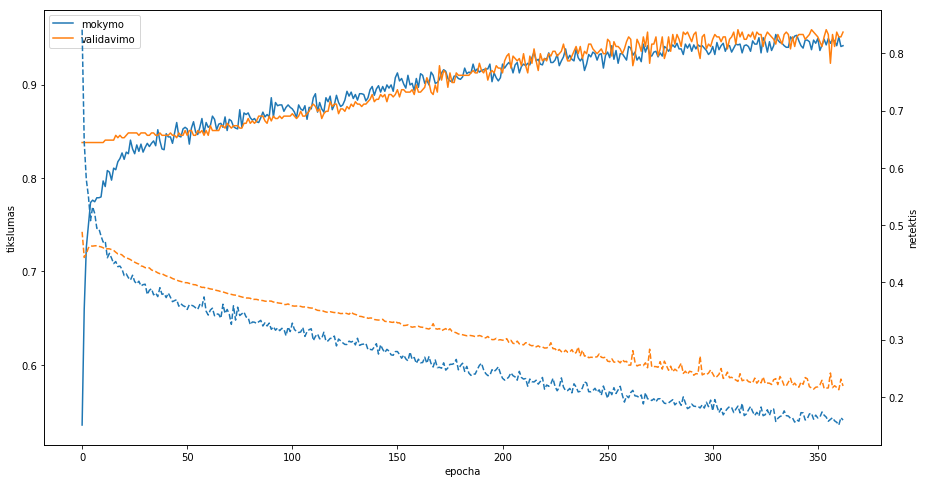

PID: 5.0 TRAIN: 1616 TEST: 229
train: x=(1212, 21, 77, 1) y=(1212, 1)
valid: x=(404, 21, 77, 1) y=(404, 1)
test : x=(229, 21, 77, 1)  y=(229, 1)
Train on 1212 samples, validate on 404 samples
Epoch 1/1000
 - 9s - loss: 0.9375 - acc: 0.5173 - val_loss: 0.6953 - val_acc: 0.6089
Epoch 2/1000
 - 0s - loss: 0.8881 - acc: 0.5454 - val_loss: 0.7106 - val_acc: 0.6040
Epoch 3/1000
 - 1s - loss: 0.8069 - acc: 0.5726 - val_loss: 0.7381 - val_acc: 0.6040
Epoch 4/1000
 - 1s - loss: 0.8409 - acc: 0.5586 - val_loss: 0.7397 - val_acc: 0.6040
Epoch 5/1000
 - 1s - loss: 0.8071 - acc: 0.5875 - val_loss: 0.7410 - val_acc: 0.6040
Epoch 6/1000
 - 1s - loss: 0.8171 - acc: 0.5875 - val_loss: 0.7250 - val_acc: 0.6040
Epoch 7/1000
 - 1s - loss: 0.8171 - acc: 0.5908 - val_loss: 0.7187 - val_acc: 0.6040
Epoch 8/1000
 - 1s - loss: 0.7754 - acc: 0.6031 - val_loss: 0.7156 - val_acc: 0.6040
Epoch 9/1000
 - 1s - loss: 0.7573 - acc: 0.6064 - val_loss: 0.7060 - val_acc: 0.6040
Epoch 10/1000
 - 1s - loss: 0.7595 - acc: 0

 - 1s - loss: 0.4951 - acc: 0.7351 - val_loss: 0.4349 - val_acc: 0.7748
Epoch 95/1000
 - 1s - loss: 0.4931 - acc: 0.7533 - val_loss: 0.4373 - val_acc: 0.7624
Epoch 96/1000
 - 1s - loss: 0.4806 - acc: 0.7706 - val_loss: 0.4325 - val_acc: 0.7748
Epoch 97/1000
 - 1s - loss: 0.4821 - acc: 0.7583 - val_loss: 0.4301 - val_acc: 0.7822
Epoch 98/1000
 - 1s - loss: 0.4863 - acc: 0.7690 - val_loss: 0.4320 - val_acc: 0.7698
Epoch 99/1000
 - 1s - loss: 0.4803 - acc: 0.7574 - val_loss: 0.4288 - val_acc: 0.7723
Epoch 100/1000
 - 1s - loss: 0.4703 - acc: 0.7550 - val_loss: 0.4248 - val_acc: 0.7723
Epoch 101/1000
 - 1s - loss: 0.4676 - acc: 0.7640 - val_loss: 0.4243 - val_acc: 0.7748
Epoch 102/1000
 - 1s - loss: 0.4780 - acc: 0.7574 - val_loss: 0.4257 - val_acc: 0.7797
Epoch 103/1000
 - 1s - loss: 0.4811 - acc: 0.7541 - val_loss: 0.4266 - val_acc: 0.7698
Epoch 104/1000
 - 1s - loss: 0.4746 - acc: 0.7706 - val_loss: 0.4214 - val_acc: 0.7772
Epoch 105/1000
 - 1s - loss: 0.4812 - acc: 0.7541 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3919 - acc: 0.8177 - val_loss: 0.3375 - val_acc: 0.8812
Epoch 190/1000
 - 1s - loss: 0.3944 - acc: 0.8193 - val_loss: 0.3322 - val_acc: 0.8762
Epoch 191/1000
 - 1s - loss: 0.3883 - acc: 0.8342 - val_loss: 0.3331 - val_acc: 0.8589
Epoch 192/1000
 - 1s - loss: 0.3854 - acc: 0.8292 - val_loss: 0.3344 - val_acc: 0.8713
Epoch 193/1000
 - 1s - loss: 0.3932 - acc: 0.8276 - val_loss: 0.3341 - val_acc: 0.8787
Epoch 194/1000
 - 1s - loss: 0.3942 - acc: 0.8259 - val_loss: 0.3404 - val_acc: 0.8540
Epoch 195/1000
 - 1s - loss: 0.3798 - acc: 0.8416 - val_loss: 0.3256 - val_acc: 0.8837
Epoch 196/1000
 - 1s - loss: 0.3833 - acc: 0.8333 - val_loss: 0.3235 - val_acc: 0.8837
Epoch 197/1000
 - 1s - loss: 0.3863 - acc: 0.8383 - val_loss: 0.3243 - val_acc: 0.8663
Epoch 198/1000
 - 1s - loss: 0.3912 - acc: 0.8251 - val_loss: 0.3211 - val_acc: 0.8787
Epoch 199/1000
 - 1s - loss: 0.3843 - acc: 0.8383 - val_loss: 0.3221 - val_acc: 0.8787
Epoch 200/1000
 - 1s - loss: 0.3704 - acc: 

 - 1s - loss: 0.3183 - acc: 0.8837 - val_loss: 0.2474 - val_acc: 0.9109
Epoch 284/1000
 - 1s - loss: 0.3202 - acc: 0.8804 - val_loss: 0.2510 - val_acc: 0.9109
Epoch 285/1000
 - 1s - loss: 0.3044 - acc: 0.8936 - val_loss: 0.2546 - val_acc: 0.9109
Epoch 286/1000
 - 1s - loss: 0.3266 - acc: 0.8820 - val_loss: 0.2550 - val_acc: 0.9109
Epoch 287/1000
 - 1s - loss: 0.3187 - acc: 0.8837 - val_loss: 0.2496 - val_acc: 0.9158
Epoch 288/1000
 - 1s - loss: 0.3164 - acc: 0.8878 - val_loss: 0.2506 - val_acc: 0.9084
Epoch 289/1000
 - 1s - loss: 0.3176 - acc: 0.8853 - val_loss: 0.2566 - val_acc: 0.9084
Epoch 290/1000
 - 1s - loss: 0.3225 - acc: 0.8837 - val_loss: 0.2469 - val_acc: 0.9109
Epoch 291/1000
 - 1s - loss: 0.3155 - acc: 0.8795 - val_loss: 0.2512 - val_acc: 0.9257
Epoch 292/1000
 - 1s - loss: 0.3153 - acc: 0.8977 - val_loss: 0.2531 - val_acc: 0.9208
Epoch 293/1000
 - 1s - loss: 0.3150 - acc: 0.8878 - val_loss: 0.2532 - val_acc: 0.9183
Epoch 294/1000
 - 1s - loss: 0.3268 - acc: 0.8738 - val_lo

Epoch 378/1000
 - 1s - loss: 0.2598 - acc: 0.9068 - val_loss: 0.1981 - val_acc: 0.9332
Epoch 379/1000
 - 1s - loss: 0.2858 - acc: 0.8903 - val_loss: 0.2040 - val_acc: 0.9431
Epoch 380/1000
 - 1s - loss: 0.2575 - acc: 0.9026 - val_loss: 0.2004 - val_acc: 0.9282
Epoch 381/1000
 - 1s - loss: 0.2807 - acc: 0.8993 - val_loss: 0.2673 - val_acc: 0.8960
Epoch 382/1000
 - 1s - loss: 0.2645 - acc: 0.9010 - val_loss: 0.2236 - val_acc: 0.9183
Epoch 383/1000
 - 1s - loss: 0.2779 - acc: 0.9010 - val_loss: 0.2122 - val_acc: 0.9208
Epoch 384/1000
 - 1s - loss: 0.2729 - acc: 0.9043 - val_loss: 0.2805 - val_acc: 0.8787
Epoch 385/1000
 - 1s - loss: 0.2970 - acc: 0.8985 - val_loss: 0.2107 - val_acc: 0.9257
Epoch 386/1000
 - 1s - loss: 0.2711 - acc: 0.9068 - val_loss: 0.2335 - val_acc: 0.9183
Epoch 387/1000
 - 1s - loss: 0.2730 - acc: 0.9068 - val_loss: 0.1993 - val_acc: 0.9381
Epoch 388/1000
 - 1s - loss: 0.2634 - acc: 0.9134 - val_loss: 0.2026 - val_acc: 0.9282
Epoch 389/1000
 - 1s - loss: 0.2833 - acc: 

 - 1s - loss: 0.2436 - acc: 0.9084 - val_loss: 0.1683 - val_acc: 0.9455
Epoch 473/1000
 - 1s - loss: 0.2524 - acc: 0.9109 - val_loss: 0.1722 - val_acc: 0.9406
Epoch 474/1000
 - 1s - loss: 0.2796 - acc: 0.8969 - val_loss: 0.1873 - val_acc: 0.9307
Epoch 475/1000
 - 1s - loss: 0.2426 - acc: 0.9068 - val_loss: 0.1781 - val_acc: 0.9381
Epoch 476/1000
 - 1s - loss: 0.2600 - acc: 0.9142 - val_loss: 0.1680 - val_acc: 0.9480
Epoch 477/1000
 - 1s - loss: 0.2511 - acc: 0.9059 - val_loss: 0.1725 - val_acc: 0.9381
Epoch 478/1000
 - 1s - loss: 0.2477 - acc: 0.9059 - val_loss: 0.1680 - val_acc: 0.9406
Epoch 479/1000
 - 1s - loss: 0.2393 - acc: 0.9191 - val_loss: 0.1763 - val_acc: 0.9431
Epoch 480/1000
 - 1s - loss: 0.2509 - acc: 0.9018 - val_loss: 0.1771 - val_acc: 0.9356
Epoch 481/1000
 - 1s - loss: 0.2353 - acc: 0.9150 - val_loss: 0.1810 - val_acc: 0.9233
Epoch 482/1000
 - 1s - loss: 0.2613 - acc: 0.9010 - val_loss: 0.1734 - val_acc: 0.9431
Epoch 483/1000
 - 1s - loss: 0.2445 - acc: 0.9183 - val_lo

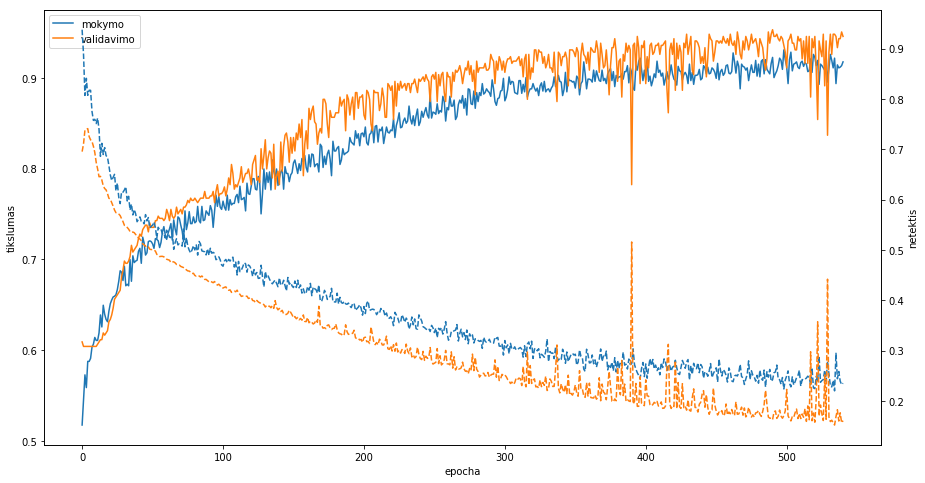

PID: 6.0 TRAIN: 1665 TEST: 180
train: x=(1248, 21, 77, 1) y=(1248, 1)
valid: x=(417, 21, 77, 1) y=(417, 1)
test : x=(180, 21, 77, 1)  y=(180, 1)
Train on 1248 samples, validate on 417 samples
Epoch 1/1000
 - 9s - loss: 0.8834 - acc: 0.5184 - val_loss: 0.6699 - val_acc: 0.6547
Epoch 2/1000
 - 1s - loss: 0.8950 - acc: 0.5296 - val_loss: 0.6629 - val_acc: 0.6523
Epoch 3/1000
 - 1s - loss: 0.8715 - acc: 0.5465 - val_loss: 0.6613 - val_acc: 0.6499
Epoch 4/1000
 - 1s - loss: 0.8200 - acc: 0.5817 - val_loss: 0.6583 - val_acc: 0.6547
Epoch 5/1000
 - 1s - loss: 0.7669 - acc: 0.6010 - val_loss: 0.6506 - val_acc: 0.6619
Epoch 6/1000
 - 1s - loss: 0.7506 - acc: 0.6146 - val_loss: 0.6421 - val_acc: 0.6691
Epoch 7/1000
 - 1s - loss: 0.7617 - acc: 0.5873 - val_loss: 0.6266 - val_acc: 0.6763
Epoch 8/1000
 - 1s - loss: 0.7377 - acc: 0.6202 - val_loss: 0.6154 - val_acc: 0.6787
Epoch 9/1000
 - 1s - loss: 0.7501 - acc: 0.6130 - val_loss: 0.6047 - val_acc: 0.6882
Epoch 10/1000
 - 1s - loss: 0.7303 - acc: 0

 - 1s - loss: 0.4175 - acc: 0.8037 - val_loss: 0.3691 - val_acc: 0.8249
Epoch 95/1000
 - 1s - loss: 0.4241 - acc: 0.8109 - val_loss: 0.3709 - val_acc: 0.8225
Epoch 96/1000
 - 1s - loss: 0.4286 - acc: 0.7941 - val_loss: 0.3714 - val_acc: 0.8225
Epoch 97/1000
 - 1s - loss: 0.4285 - acc: 0.7941 - val_loss: 0.3643 - val_acc: 0.8225
Epoch 98/1000
 - 1s - loss: 0.4172 - acc: 0.8005 - val_loss: 0.3629 - val_acc: 0.8201
Epoch 99/1000
 - 1s - loss: 0.4257 - acc: 0.7957 - val_loss: 0.3609 - val_acc: 0.8273
Epoch 100/1000
 - 1s - loss: 0.4395 - acc: 0.7973 - val_loss: 0.3649 - val_acc: 0.8249
Epoch 101/1000
 - 1s - loss: 0.4188 - acc: 0.8149 - val_loss: 0.3691 - val_acc: 0.8153
Epoch 102/1000
 - 1s - loss: 0.4050 - acc: 0.8045 - val_loss: 0.3565 - val_acc: 0.8321
Epoch 103/1000
 - 1s - loss: 0.4173 - acc: 0.8173 - val_loss: 0.3577 - val_acc: 0.8225
Epoch 104/1000
 - 1s - loss: 0.4065 - acc: 0.8213 - val_loss: 0.3558 - val_acc: 0.8273
Epoch 105/1000
 - 1s - loss: 0.4160 - acc: 0.8117 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3047 - acc: 0.8870 - val_loss: 0.2391 - val_acc: 0.9185
Epoch 190/1000
 - 1s - loss: 0.2945 - acc: 0.8902 - val_loss: 0.2417 - val_acc: 0.9065
Epoch 191/1000
 - 1s - loss: 0.3022 - acc: 0.8950 - val_loss: 0.2389 - val_acc: 0.9233
Epoch 192/1000
 - 1s - loss: 0.2954 - acc: 0.8950 - val_loss: 0.2380 - val_acc: 0.9233
Epoch 193/1000
 - 1s - loss: 0.3024 - acc: 0.8886 - val_loss: 0.2406 - val_acc: 0.9161
Epoch 194/1000
 - 1s - loss: 0.3008 - acc: 0.8910 - val_loss: 0.2710 - val_acc: 0.8801
Epoch 195/1000
 - 1s - loss: 0.3024 - acc: 0.8878 - val_loss: 0.2436 - val_acc: 0.9185
Epoch 196/1000
 - 1s - loss: 0.3068 - acc: 0.8822 - val_loss: 0.2389 - val_acc: 0.9137
Epoch 197/1000
 - 1s - loss: 0.2981 - acc: 0.8918 - val_loss: 0.2331 - val_acc: 0.9209
Epoch 198/1000
 - 1s - loss: 0.2934 - acc: 0.8958 - val_loss: 0.2375 - val_acc: 0.9137
Epoch 199/1000
 - 1s - loss: 0.2850 - acc: 0.8862 - val_loss: 0.2319 - val_acc: 0.9065
Epoch 200/1000
 - 1s - loss: 0.2984 - acc: 

 - 1s - loss: 0.2457 - acc: 0.9183 - val_loss: 0.1798 - val_acc: 0.9281
Epoch 284/1000
 - 1s - loss: 0.2737 - acc: 0.9079 - val_loss: 0.1920 - val_acc: 0.9185
Epoch 285/1000
 - 1s - loss: 0.2485 - acc: 0.9135 - val_loss: 0.1805 - val_acc: 0.9329
Epoch 286/1000
 - 1s - loss: 0.2565 - acc: 0.9087 - val_loss: 0.1820 - val_acc: 0.9329
Epoch 287/1000
 - 1s - loss: 0.2542 - acc: 0.9143 - val_loss: 0.2585 - val_acc: 0.8849
Epoch 288/1000
 - 1s - loss: 0.2483 - acc: 0.9119 - val_loss: 0.1937 - val_acc: 0.9305
Epoch 289/1000
 - 1s - loss: 0.2326 - acc: 0.9255 - val_loss: 0.1698 - val_acc: 0.9257
Epoch 290/1000
 - 1s - loss: 0.2394 - acc: 0.9207 - val_loss: 0.2033 - val_acc: 0.9257
Epoch 291/1000
 - 1s - loss: 0.2485 - acc: 0.9071 - val_loss: 0.1770 - val_acc: 0.9281
Epoch 292/1000
 - 1s - loss: 0.2482 - acc: 0.9175 - val_loss: 0.2703 - val_acc: 0.8849
Epoch 293/1000
 - 1s - loss: 0.2564 - acc: 0.9183 - val_loss: 0.1900 - val_acc: 0.9353
Epoch 294/1000
 - 1s - loss: 0.2468 - acc: 0.9151 - val_lo

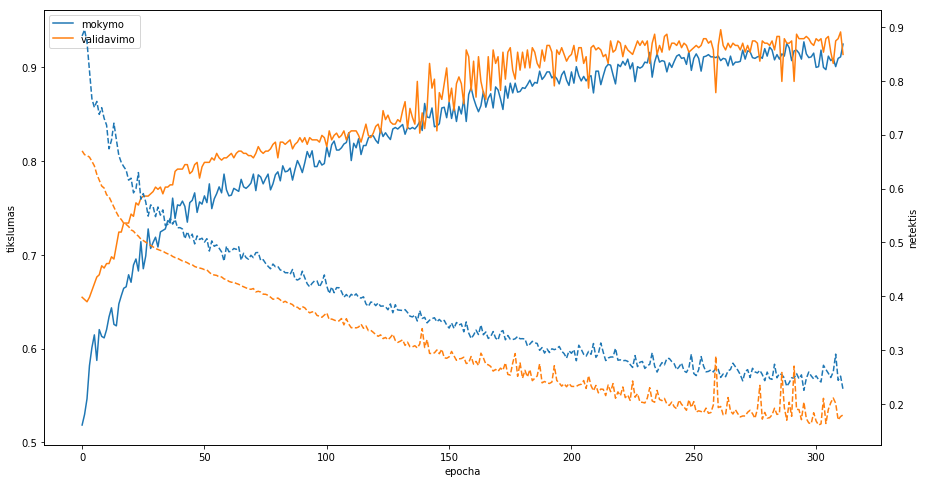

PID: 208.0 TRAIN: 1677 TEST: 168
train: x=(1257, 21, 77, 1) y=(1257, 1)
valid: x=(420, 21, 77, 1) y=(420, 1)
test : x=(168, 21, 77, 1)  y=(168, 1)
Train on 1257 samples, validate on 420 samples
Epoch 1/1000
 - 9s - loss: 0.8567 - acc: 0.5402 - val_loss: 0.6293 - val_acc: 0.7738
Epoch 2/1000
 - 1s - loss: 0.8291 - acc: 0.6118 - val_loss: 0.6547 - val_acc: 0.7714
Epoch 3/1000
 - 1s - loss: 0.7836 - acc: 0.6388 - val_loss: 0.6804 - val_acc: 0.7714
Epoch 4/1000
 - 1s - loss: 0.7555 - acc: 0.6539 - val_loss: 0.6868 - val_acc: 0.7714
Epoch 5/1000
 - 1s - loss: 0.7787 - acc: 0.6659 - val_loss: 0.6794 - val_acc: 0.7714
Epoch 6/1000
 - 1s - loss: 0.7131 - acc: 0.6913 - val_loss: 0.6631 - val_acc: 0.7714
Epoch 7/1000
 - 1s - loss: 0.7071 - acc: 0.6810 - val_loss: 0.6474 - val_acc: 0.7714
Epoch 8/1000
 - 1s - loss: 0.7612 - acc: 0.6691 - val_loss: 0.6345 - val_acc: 0.7738
Epoch 9/1000
 - 1s - loss: 0.6895 - acc: 0.6993 - val_loss: 0.6195 - val_acc: 0.7714
Epoch 10/1000
 - 1s - loss: 0.6756 - acc:

 - 1s - loss: 0.3949 - acc: 0.8321 - val_loss: 0.3200 - val_acc: 0.8690
Epoch 95/1000
 - 1s - loss: 0.3964 - acc: 0.8210 - val_loss: 0.3217 - val_acc: 0.8762
Epoch 96/1000
 - 1s - loss: 0.3898 - acc: 0.8290 - val_loss: 0.3197 - val_acc: 0.8762
Epoch 97/1000
 - 1s - loss: 0.3957 - acc: 0.8329 - val_loss: 0.3153 - val_acc: 0.8738
Epoch 98/1000
 - 1s - loss: 0.3784 - acc: 0.8496 - val_loss: 0.3157 - val_acc: 0.8738
Epoch 99/1000
 - 1s - loss: 0.3747 - acc: 0.8425 - val_loss: 0.3147 - val_acc: 0.8738
Epoch 100/1000
 - 1s - loss: 0.3626 - acc: 0.8528 - val_loss: 0.3138 - val_acc: 0.8762
Epoch 101/1000
 - 1s - loss: 0.3723 - acc: 0.8417 - val_loss: 0.3159 - val_acc: 0.8738
Epoch 102/1000
 - 1s - loss: 0.3887 - acc: 0.8417 - val_loss: 0.3144 - val_acc: 0.8762
Epoch 103/1000
 - 1s - loss: 0.3764 - acc: 0.8321 - val_loss: 0.3119 - val_acc: 0.8762
Epoch 104/1000
 - 1s - loss: 0.3866 - acc: 0.8401 - val_loss: 0.3132 - val_acc: 0.8714
Epoch 105/1000
 - 1s - loss: 0.3891 - acc: 0.8481 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3065 - acc: 0.8727 - val_loss: 0.3055 - val_acc: 0.8881
Epoch 190/1000
 - 1s - loss: 0.3294 - acc: 0.8512 - val_loss: 0.2726 - val_acc: 0.8976
Epoch 191/1000
 - 1s - loss: 0.3366 - acc: 0.8616 - val_loss: 0.2747 - val_acc: 0.9048
Epoch 192/1000
 - 0s - loss: 0.3154 - acc: 0.8648 - val_loss: 0.2746 - val_acc: 0.8952
Epoch 193/1000
 - 1s - loss: 0.3280 - acc: 0.8600 - val_loss: 0.2715 - val_acc: 0.8976
Epoch 194/1000
 - 1s - loss: 0.3030 - acc: 0.8807 - val_loss: 0.2732 - val_acc: 0.9000
Epoch 195/1000
 - 1s - loss: 0.3000 - acc: 0.8791 - val_loss: 0.2749 - val_acc: 0.9048
Epoch 196/1000
 - 1s - loss: 0.3166 - acc: 0.8608 - val_loss: 0.2736 - val_acc: 0.9119
Epoch 197/1000
 - 1s - loss: 0.3131 - acc: 0.8759 - val_loss: 0.2746 - val_acc: 0.9024
Epoch 198/1000
 - 1s - loss: 0.3208 - acc: 0.8703 - val_loss: 0.2725 - val_acc: 0.9024
Epoch 199/1000
 - 1s - loss: 0.3187 - acc: 0.8600 - val_loss: 0.2707 - val_acc: 0.9048
Epoch 200/1000
 - 1s - loss: 0.3019 - acc: 

 - 1s - loss: 0.2673 - acc: 0.8910 - val_loss: 0.2324 - val_acc: 0.9167
Epoch 284/1000
 - 1s - loss: 0.2553 - acc: 0.8990 - val_loss: 0.2467 - val_acc: 0.9095
Epoch 285/1000
 - 1s - loss: 0.2731 - acc: 0.8966 - val_loss: 0.2312 - val_acc: 0.9143
Epoch 286/1000
 - 1s - loss: 0.2618 - acc: 0.8950 - val_loss: 0.2509 - val_acc: 0.8976
Epoch 287/1000
 - 1s - loss: 0.2584 - acc: 0.8926 - val_loss: 0.3323 - val_acc: 0.8762
Epoch 288/1000
 - 1s - loss: 0.2587 - acc: 0.8958 - val_loss: 0.2312 - val_acc: 0.9143
Epoch 289/1000
 - 1s - loss: 0.2522 - acc: 0.9037 - val_loss: 0.2769 - val_acc: 0.9000
Epoch 290/1000
 - 1s - loss: 0.2696 - acc: 0.8854 - val_loss: 0.2521 - val_acc: 0.9071
Epoch 291/1000
 - 1s - loss: 0.2434 - acc: 0.9053 - val_loss: 0.2308 - val_acc: 0.9238
Epoch 292/1000
 - 1s - loss: 0.2751 - acc: 0.8894 - val_loss: 0.2262 - val_acc: 0.9167
Epoch 293/1000
 - 1s - loss: 0.2572 - acc: 0.8958 - val_loss: 0.2248 - val_acc: 0.9190
Epoch 294/1000
 - 1s - loss: 0.2457 - acc: 0.9021 - val_lo

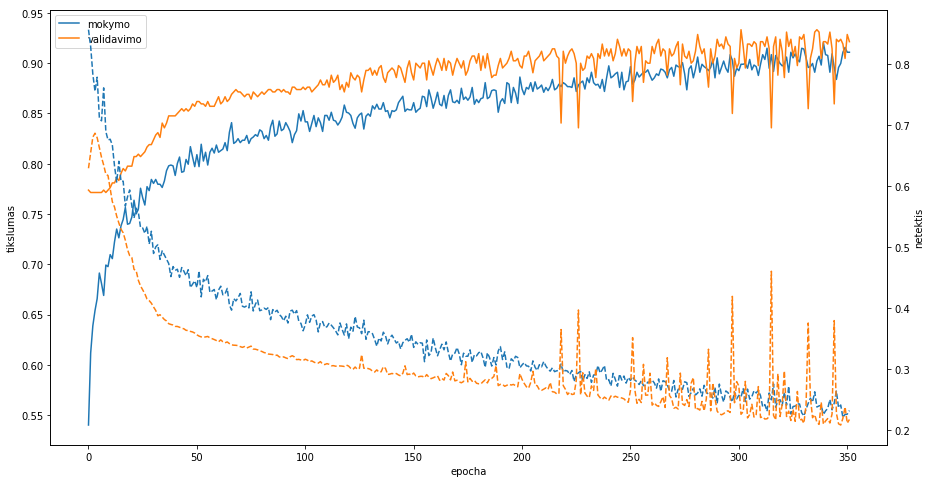

PID: 0.0 TRAIN: 1726 TEST: 119
train: x=(1294, 21, 77, 1) y=(1294, 1)
valid: x=(432, 21, 77, 1) y=(432, 1)
test : x=(119, 21, 77, 1)  y=(119, 1)
Train on 1294 samples, validate on 432 samples
Epoch 1/1000
 - 9s - loss: 0.8425 - acc: 0.5471 - val_loss: 0.6552 - val_acc: 0.6597
Epoch 2/1000
 - 1s - loss: 0.8425 - acc: 0.5680 - val_loss: 0.6666 - val_acc: 0.6597
Epoch 3/1000
 - 1s - loss: 0.8345 - acc: 0.5641 - val_loss: 0.6917 - val_acc: 0.6597
Epoch 4/1000
 - 1s - loss: 0.8061 - acc: 0.5889 - val_loss: 0.6898 - val_acc: 0.6597
Epoch 5/1000
 - 1s - loss: 0.7634 - acc: 0.5912 - val_loss: 0.6943 - val_acc: 0.6597
Epoch 6/1000
 - 1s - loss: 0.7700 - acc: 0.6082 - val_loss: 0.6927 - val_acc: 0.6597
Epoch 7/1000
 - 1s - loss: 0.7506 - acc: 0.6144 - val_loss: 0.6916 - val_acc: 0.6597
Epoch 8/1000
 - 1s - loss: 0.7644 - acc: 0.6036 - val_loss: 0.6799 - val_acc: 0.6597
Epoch 9/1000
 - 1s - loss: 0.7381 - acc: 0.6244 - val_loss: 0.6727 - val_acc: 0.6597
Epoch 10/1000
 - 1s - loss: 0.7042 - acc: 0

 - 1s - loss: 0.4026 - acc: 0.8199 - val_loss: 0.3996 - val_acc: 0.8125
Epoch 95/1000
 - 1s - loss: 0.4224 - acc: 0.8122 - val_loss: 0.3971 - val_acc: 0.8657
Epoch 96/1000
 - 1s - loss: 0.4193 - acc: 0.8184 - val_loss: 0.3952 - val_acc: 0.8565
Epoch 97/1000
 - 1s - loss: 0.4229 - acc: 0.8199 - val_loss: 0.3963 - val_acc: 0.8310
Epoch 98/1000
 - 1s - loss: 0.4088 - acc: 0.8238 - val_loss: 0.4033 - val_acc: 0.7986
Epoch 99/1000
 - 1s - loss: 0.4115 - acc: 0.8184 - val_loss: 0.3942 - val_acc: 0.8194
Epoch 100/1000
 - 1s - loss: 0.4064 - acc: 0.8269 - val_loss: 0.3915 - val_acc: 0.8472
Epoch 101/1000
 - 1s - loss: 0.4011 - acc: 0.8277 - val_loss: 0.3875 - val_acc: 0.8773
Epoch 102/1000
 - 1s - loss: 0.3878 - acc: 0.8207 - val_loss: 0.3855 - val_acc: 0.8519
Epoch 103/1000
 - 1s - loss: 0.4096 - acc: 0.8323 - val_loss: 0.4120 - val_acc: 0.8403
Epoch 104/1000
 - 1s - loss: 0.3991 - acc: 0.8246 - val_loss: 0.3854 - val_acc: 0.8472
Epoch 105/1000
 - 1s - loss: 0.3936 - acc: 0.8377 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2558 - acc: 0.9111 - val_loss: 0.2416 - val_acc: 0.9444
Epoch 190/1000
 - 1s - loss: 0.2620 - acc: 0.9057 - val_loss: 0.2535 - val_acc: 0.9167
Epoch 191/1000
 - 1s - loss: 0.2677 - acc: 0.9057 - val_loss: 0.2516 - val_acc: 0.9282
Epoch 192/1000
 - 1s - loss: 0.2676 - acc: 0.9096 - val_loss: 0.2260 - val_acc: 0.9444
Epoch 193/1000
 - 1s - loss: 0.2720 - acc: 0.9134 - val_loss: 0.2291 - val_acc: 0.9352
Epoch 194/1000
 - 1s - loss: 0.2786 - acc: 0.8957 - val_loss: 0.4093 - val_acc: 0.8287
Epoch 195/1000
 - 1s - loss: 0.2623 - acc: 0.9065 - val_loss: 0.3084 - val_acc: 0.9028
Epoch 196/1000
 - 1s - loss: 0.2846 - acc: 0.8941 - val_loss: 0.2454 - val_acc: 0.9352
Epoch 197/1000
 - 1s - loss: 0.2656 - acc: 0.9065 - val_loss: 0.2212 - val_acc: 0.9421
Epoch 198/1000
 - 1s - loss: 0.2494 - acc: 0.9111 - val_loss: 0.3145 - val_acc: 0.8958
Epoch 199/1000
 - 1s - loss: 0.2646 - acc: 0.9026 - val_loss: 0.2305 - val_acc: 0.9306
Epoch 200/1000
 - 1s - loss: 0.2472 - acc: 

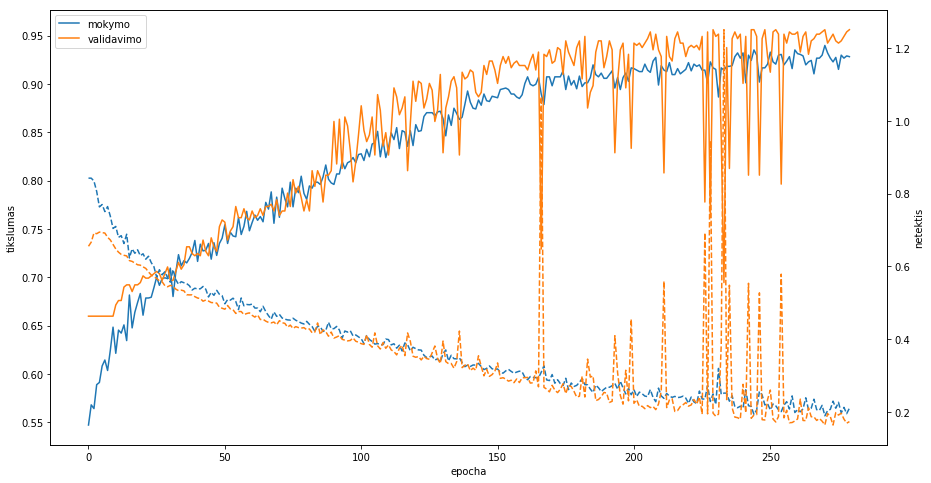

PID: 4.0 TRAIN: 1728 TEST: 117
train: x=(1296, 21, 77, 1) y=(1296, 1)
valid: x=(432, 21, 77, 1) y=(432, 1)
test : x=(117, 21, 77, 1)  y=(117, 1)
Train on 1296 samples, validate on 432 samples
Epoch 1/1000
 - 9s - loss: 0.8781 - acc: 0.5401 - val_loss: 0.6408 - val_acc: 0.7014
Epoch 2/1000
 - 1s - loss: 0.8306 - acc: 0.5710 - val_loss: 0.6304 - val_acc: 0.7014
Epoch 3/1000
 - 1s - loss: 0.8428 - acc: 0.5548 - val_loss: 0.6294 - val_acc: 0.7014
Epoch 4/1000
 - 1s - loss: 0.8318 - acc: 0.5694 - val_loss: 0.6325 - val_acc: 0.7014
Epoch 5/1000
 - 1s - loss: 0.8075 - acc: 0.5910 - val_loss: 0.6289 - val_acc: 0.7014
Epoch 6/1000
 - 1s - loss: 0.8123 - acc: 0.5833 - val_loss: 0.6166 - val_acc: 0.7014
Epoch 7/1000
 - 1s - loss: 0.7813 - acc: 0.5949 - val_loss: 0.6070 - val_acc: 0.7037
Epoch 8/1000
 - 1s - loss: 0.7699 - acc: 0.5880 - val_loss: 0.5976 - val_acc: 0.7083
Epoch 9/1000
 - 1s - loss: 0.7314 - acc: 0.6096 - val_loss: 0.5888 - val_acc: 0.7176
Epoch 10/1000
 - 1s - loss: 0.7438 - acc: 0

 - 1s - loss: 0.5100 - acc: 0.7500 - val_loss: 0.4255 - val_acc: 0.7963
Epoch 95/1000
 - 1s - loss: 0.5042 - acc: 0.7531 - val_loss: 0.4239 - val_acc: 0.8009
Epoch 96/1000
 - 1s - loss: 0.5029 - acc: 0.7477 - val_loss: 0.4221 - val_acc: 0.7986
Epoch 97/1000
 - 1s - loss: 0.5082 - acc: 0.7346 - val_loss: 0.4225 - val_acc: 0.7986
Epoch 98/1000
 - 1s - loss: 0.4981 - acc: 0.7531 - val_loss: 0.4226 - val_acc: 0.8009
Epoch 99/1000
 - 1s - loss: 0.4847 - acc: 0.7654 - val_loss: 0.4234 - val_acc: 0.7963
Epoch 100/1000
 - 1s - loss: 0.5000 - acc: 0.7461 - val_loss: 0.4196 - val_acc: 0.8032
Epoch 101/1000
 - 1s - loss: 0.5134 - acc: 0.7307 - val_loss: 0.4219 - val_acc: 0.7986
Epoch 102/1000
 - 1s - loss: 0.4937 - acc: 0.7531 - val_loss: 0.4185 - val_acc: 0.8032
Epoch 103/1000
 - 1s - loss: 0.4993 - acc: 0.7554 - val_loss: 0.4181 - val_acc: 0.7986
Epoch 104/1000
 - 1s - loss: 0.5055 - acc: 0.7492 - val_loss: 0.4169 - val_acc: 0.8032
Epoch 105/1000
 - 1s - loss: 0.4973 - acc: 0.7554 - val_loss: 0

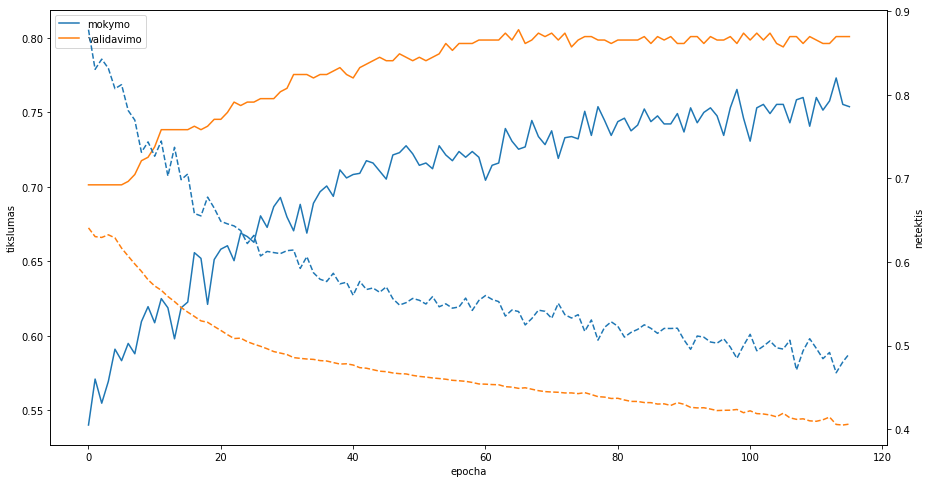

PID: 7.0 TRAIN: 1744 TEST: 101
train: x=(1308, 21, 77, 1) y=(1308, 1)
valid: x=(436, 21, 77, 1) y=(436, 1)
test : x=(101, 21, 77, 1)  y=(101, 1)
Train on 1308 samples, validate on 436 samples
Epoch 1/1000
 - 9s - loss: 0.9187 - acc: 0.5321 - val_loss: 0.6696 - val_acc: 0.6628
Epoch 2/1000
 - 1s - loss: 0.8956 - acc: 0.5612 - val_loss: 0.6755 - val_acc: 0.6789
Epoch 3/1000
 - 1s - loss: 0.8532 - acc: 0.5749 - val_loss: 0.6879 - val_acc: 0.6835
Epoch 4/1000
 - 1s - loss: 0.8135 - acc: 0.5841 - val_loss: 0.6845 - val_acc: 0.6789
Epoch 5/1000
 - 1s - loss: 0.8374 - acc: 0.5833 - val_loss: 0.6761 - val_acc: 0.6743
Epoch 6/1000
 - 1s - loss: 0.8395 - acc: 0.5810 - val_loss: 0.6795 - val_acc: 0.6743
Epoch 7/1000
 - 1s - loss: 0.8589 - acc: 0.5787 - val_loss: 0.6733 - val_acc: 0.6789
Epoch 8/1000
 - 1s - loss: 0.7824 - acc: 0.6070 - val_loss: 0.6742 - val_acc: 0.6789
Epoch 9/1000
 - 1s - loss: 0.7922 - acc: 0.6216 - val_loss: 0.6695 - val_acc: 0.6789
Epoch 10/1000
 - 1s - loss: 0.7462 - acc: 0

 - 1s - loss: 0.4771 - acc: 0.7622 - val_loss: 0.4475 - val_acc: 0.7729
Epoch 95/1000
 - 1s - loss: 0.4825 - acc: 0.7615 - val_loss: 0.4538 - val_acc: 0.7661
Epoch 96/1000
 - 1s - loss: 0.4886 - acc: 0.7638 - val_loss: 0.4417 - val_acc: 0.7752
Epoch 97/1000
 - 1s - loss: 0.4784 - acc: 0.7699 - val_loss: 0.4413 - val_acc: 0.7729
Epoch 98/1000
 - 1s - loss: 0.4640 - acc: 0.7722 - val_loss: 0.4388 - val_acc: 0.7775
Epoch 99/1000
 - 1s - loss: 0.4721 - acc: 0.7745 - val_loss: 0.4372 - val_acc: 0.7775
Epoch 100/1000
 - 1s - loss: 0.4732 - acc: 0.7661 - val_loss: 0.4416 - val_acc: 0.7752
Epoch 101/1000
 - 1s - loss: 0.4718 - acc: 0.7691 - val_loss: 0.4395 - val_acc: 0.7775
Epoch 102/1000
 - 1s - loss: 0.4716 - acc: 0.7630 - val_loss: 0.4336 - val_acc: 0.7821
Epoch 103/1000
 - 1s - loss: 0.4672 - acc: 0.7768 - val_loss: 0.4320 - val_acc: 0.7821
Epoch 104/1000
 - 1s - loss: 0.4637 - acc: 0.7668 - val_loss: 0.4278 - val_acc: 0.7844
Epoch 105/1000
 - 1s - loss: 0.4743 - acc: 0.7806 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3282 - acc: 0.8869 - val_loss: 0.2976 - val_acc: 0.9243
Epoch 190/1000
 - 1s - loss: 0.3340 - acc: 0.8838 - val_loss: 0.3106 - val_acc: 0.8991
Epoch 191/1000
 - 1s - loss: 0.3505 - acc: 0.8746 - val_loss: 0.3016 - val_acc: 0.9106
Epoch 192/1000
 - 1s - loss: 0.3228 - acc: 0.8876 - val_loss: 0.2974 - val_acc: 0.9060
Epoch 193/1000
 - 1s - loss: 0.3186 - acc: 0.8884 - val_loss: 0.2946 - val_acc: 0.9014
Epoch 194/1000
 - 1s - loss: 0.3290 - acc: 0.8907 - val_loss: 0.2796 - val_acc: 0.9335
Epoch 195/1000
 - 1s - loss: 0.3148 - acc: 0.9014 - val_loss: 0.2988 - val_acc: 0.9083
Epoch 196/1000
 - 1s - loss: 0.3145 - acc: 0.8907 - val_loss: 0.2790 - val_acc: 0.9243
Epoch 197/1000
 - 1s - loss: 0.3125 - acc: 0.8891 - val_loss: 0.2939 - val_acc: 0.9083
Epoch 198/1000
 - 1s - loss: 0.3154 - acc: 0.8899 - val_loss: 0.2936 - val_acc: 0.9014
Epoch 199/1000
 - 1s - loss: 0.3231 - acc: 0.8884 - val_loss: 0.2765 - val_acc: 0.9220
Epoch 200/1000
 - 1s - loss: 0.3250 - acc: 

 - 1s - loss: 0.2276 - acc: 0.9243 - val_loss: 0.1720 - val_acc: 0.9495
Epoch 284/1000
 - 1s - loss: 0.1918 - acc: 0.9404 - val_loss: 0.1646 - val_acc: 0.9587
Epoch 285/1000
 - 0s - loss: 0.1878 - acc: 0.9526 - val_loss: 0.5191 - val_acc: 0.8326
Epoch 286/1000
 - 1s - loss: 0.2348 - acc: 0.9289 - val_loss: 0.1634 - val_acc: 0.9564
Epoch 287/1000
 - 1s - loss: 0.2161 - acc: 0.9251 - val_loss: 0.2700 - val_acc: 0.9060
Epoch 288/1000
 - 1s - loss: 0.1907 - acc: 0.9465 - val_loss: 0.1593 - val_acc: 0.9633
Epoch 289/1000
 - 1s - loss: 0.1909 - acc: 0.9388 - val_loss: 0.2037 - val_acc: 0.9450
Epoch 290/1000
 - 1s - loss: 0.2135 - acc: 0.9343 - val_loss: 0.1566 - val_acc: 0.9633
Epoch 291/1000
 - 1s - loss: 0.1874 - acc: 0.9419 - val_loss: 0.1535 - val_acc: 0.9702
Epoch 292/1000
 - 1s - loss: 0.1963 - acc: 0.9411 - val_loss: 0.1765 - val_acc: 0.9450
Epoch 293/1000
 - 1s - loss: 0.1809 - acc: 0.9465 - val_loss: 0.1607 - val_acc: 0.9564
Epoch 294/1000
 - 1s - loss: 0.1943 - acc: 0.9434 - val_lo

Epoch 378/1000
 - 1s - loss: 0.1475 - acc: 0.9534 - val_loss: 0.1305 - val_acc: 0.9656
Epoch 379/1000
 - 1s - loss: 0.1635 - acc: 0.9526 - val_loss: 0.1452 - val_acc: 0.9587
Epoch 380/1000
 - 1s - loss: 0.1497 - acc: 0.9503 - val_loss: 0.1500 - val_acc: 0.9541
Epoch 381/1000
 - 1s - loss: 0.1348 - acc: 0.9641 - val_loss: 0.1123 - val_acc: 0.9794
Epoch 382/1000
 - 1s - loss: 0.1894 - acc: 0.9526 - val_loss: 0.1765 - val_acc: 0.9518
Epoch 383/1000
 - 1s - loss: 0.1424 - acc: 0.9564 - val_loss: 0.1222 - val_acc: 0.9633
Epoch 384/1000
 - 1s - loss: 0.1462 - acc: 0.9572 - val_loss: 0.1152 - val_acc: 0.9725
Epoch 385/1000
 - 1s - loss: 0.1598 - acc: 0.9557 - val_loss: 0.1217 - val_acc: 0.9702
Epoch 386/1000
 - 1s - loss: 0.1593 - acc: 0.9572 - val_loss: 0.2627 - val_acc: 0.9197
Epoch 387/1000
 - 1s - loss: 0.1488 - acc: 0.9534 - val_loss: 0.1180 - val_acc: 0.9725
Epoch 388/1000
 - 1s - loss: 0.1545 - acc: 0.9595 - val_loss: 0.1158 - val_acc: 0.9656
Epoch 389/1000
 - 1s - loss: 0.1485 - acc: 

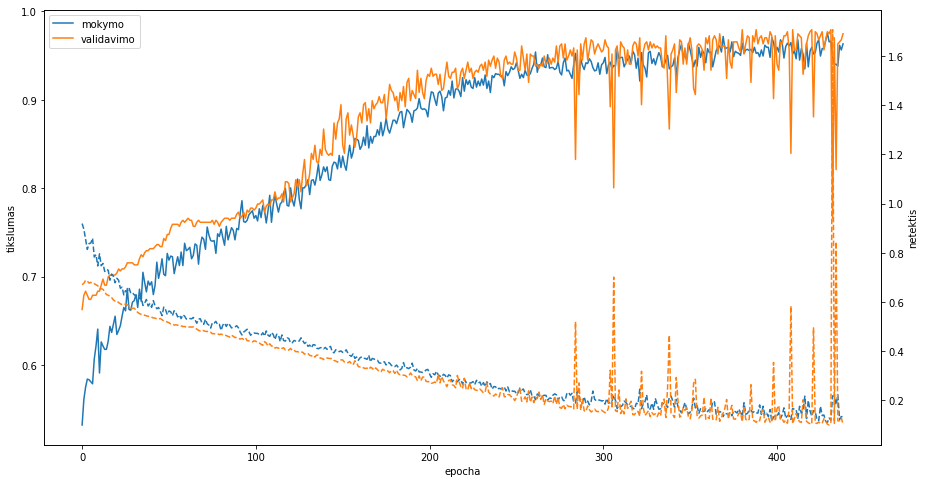

PID: 9.0 TRAIN: 1779 TEST: 66
train: x=(1334, 21, 77, 1) y=(1334, 1)
valid: x=(445, 21, 77, 1) y=(445, 1)
test : x=(66, 21, 77, 1)  y=(66, 1)
Train on 1334 samples, validate on 445 samples
Epoch 1/1000
 - 9s - loss: 0.8711 - acc: 0.5195 - val_loss: 0.6518 - val_acc: 0.6629
Epoch 2/1000
 - 0s - loss: 0.8244 - acc: 0.5892 - val_loss: 0.6746 - val_acc: 0.6674
Epoch 3/1000
 - 1s - loss: 0.8461 - acc: 0.5727 - val_loss: 0.6857 - val_acc: 0.6674
Epoch 4/1000
 - 1s - loss: 0.8220 - acc: 0.5960 - val_loss: 0.6798 - val_acc: 0.6674
Epoch 5/1000
 - 1s - loss: 0.8190 - acc: 0.6012 - val_loss: 0.6710 - val_acc: 0.6674
Epoch 6/1000
 - 1s - loss: 0.7729 - acc: 0.6072 - val_loss: 0.6708 - val_acc: 0.6674
Epoch 7/1000
 - 1s - loss: 0.7604 - acc: 0.6154 - val_loss: 0.6689 - val_acc: 0.6697
Epoch 8/1000
 - 1s - loss: 0.7649 - acc: 0.6334 - val_loss: 0.6564 - val_acc: 0.6674
Epoch 9/1000
 - 1s - loss: 0.7778 - acc: 0.6184 - val_loss: 0.6483 - val_acc: 0.6697
Epoch 10/1000
 - 1s - loss: 0.7372 - acc: 0.63

Epoch 95/1000
 - 1s - loss: 0.4630 - acc: 0.7751 - val_loss: 0.4602 - val_acc: 0.7753
Epoch 96/1000
 - 1s - loss: 0.4828 - acc: 0.7669 - val_loss: 0.4595 - val_acc: 0.7730
Epoch 97/1000
 - 1s - loss: 0.4764 - acc: 0.7579 - val_loss: 0.4572 - val_acc: 0.7730
Epoch 98/1000
 - 1s - loss: 0.4692 - acc: 0.7624 - val_loss: 0.4605 - val_acc: 0.7708
Epoch 99/1000
 - 1s - loss: 0.4781 - acc: 0.7624 - val_loss: 0.4646 - val_acc: 0.7551
Epoch 100/1000
 - 1s - loss: 0.4849 - acc: 0.7669 - val_loss: 0.4552 - val_acc: 0.7663
Epoch 101/1000
 - 1s - loss: 0.4722 - acc: 0.7534 - val_loss: 0.4555 - val_acc: 0.7708
Epoch 102/1000
 - 1s - loss: 0.4733 - acc: 0.7631 - val_loss: 0.4752 - val_acc: 0.7461
Epoch 103/1000
 - 1s - loss: 0.4798 - acc: 0.7616 - val_loss: 0.4687 - val_acc: 0.7528
Epoch 104/1000
 - 1s - loss: 0.4646 - acc: 0.7751 - val_loss: 0.4590 - val_acc: 0.7640
Epoch 105/1000
 - 1s - loss: 0.4604 - acc: 0.7781 - val_loss: 0.4498 - val_acc: 0.7865
Epoch 106/1000
 - 1s - loss: 0.4641 - acc: 0.772

Epoch 190/1000
 - 1s - loss: 0.3479 - acc: 0.8493 - val_loss: 0.3607 - val_acc: 0.8719
Epoch 191/1000
 - 1s - loss: 0.3520 - acc: 0.8471 - val_loss: 0.3623 - val_acc: 0.8584
Epoch 192/1000
 - 1s - loss: 0.3604 - acc: 0.8283 - val_loss: 0.3562 - val_acc: 0.8944
Epoch 193/1000
 - 1s - loss: 0.3472 - acc: 0.8501 - val_loss: 0.3669 - val_acc: 0.8472
Epoch 194/1000
 - 1s - loss: 0.3473 - acc: 0.8306 - val_loss: 0.3729 - val_acc: 0.8787
Epoch 195/1000
 - 1s - loss: 0.3416 - acc: 0.8493 - val_loss: 0.3668 - val_acc: 0.8944
Epoch 196/1000
 - 1s - loss: 0.3343 - acc: 0.8576 - val_loss: 0.3571 - val_acc: 0.9034
Epoch 197/1000
 - 1s - loss: 0.3434 - acc: 0.8403 - val_loss: 0.3816 - val_acc: 0.8652
Epoch 198/1000
 - 1s - loss: 0.3431 - acc: 0.8576 - val_loss: 0.3631 - val_acc: 0.8989
Epoch 199/1000
 - 1s - loss: 0.3391 - acc: 0.8598 - val_loss: 0.3481 - val_acc: 0.8944
Epoch 200/1000
 - 1s - loss: 0.3338 - acc: 0.8598 - val_loss: 0.3463 - val_acc: 0.8966
Epoch 201/1000
 - 1s - loss: 0.3334 - acc: 

 - 1s - loss: 0.2754 - acc: 0.8891 - val_loss: 0.2503 - val_acc: 0.9416
Epoch 285/1000
 - 1s - loss: 0.2535 - acc: 0.9055 - val_loss: 0.2623 - val_acc: 0.9326
Epoch 286/1000
 - 0s - loss: 0.2491 - acc: 0.9048 - val_loss: 0.2909 - val_acc: 0.9124
Epoch 287/1000
 - 0s - loss: 0.2471 - acc: 0.9115 - val_loss: 0.3231 - val_acc: 0.9079
Epoch 288/1000
 - 1s - loss: 0.2665 - acc: 0.8981 - val_loss: 0.2539 - val_acc: 0.9348
Epoch 289/1000
 - 1s - loss: 0.2813 - acc: 0.8876 - val_loss: 0.2507 - val_acc: 0.9393
Epoch 290/1000
 - 1s - loss: 0.2673 - acc: 0.8846 - val_loss: 0.2580 - val_acc: 0.9371
Epoch 291/1000
 - 1s - loss: 0.2370 - acc: 0.9063 - val_loss: 0.2885 - val_acc: 0.9124
Epoch 292/1000
 - 1s - loss: 0.2532 - acc: 0.9025 - val_loss: 0.2632 - val_acc: 0.9303
Epoch 293/1000
 - 1s - loss: 0.2494 - acc: 0.9025 - val_loss: 0.2592 - val_acc: 0.9348
Epoch 294/1000
 - 1s - loss: 0.2451 - acc: 0.9040 - val_loss: 0.2544 - val_acc: 0.9416
Epoch 295/1000
 - 1s - loss: 0.2609 - acc: 0.9010 - val_lo

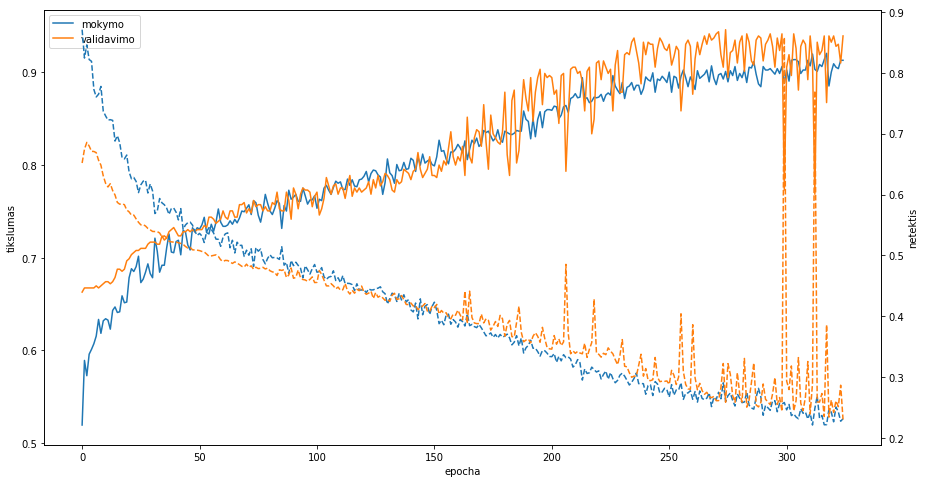

PID: 3.0 TRAIN: 1794 TEST: 51
train: x=(1345, 21, 77, 1) y=(1345, 1)
valid: x=(449, 21, 77, 1) y=(449, 1)
test : x=(51, 21, 77, 1)  y=(51, 1)
Train on 1345 samples, validate on 449 samples
Epoch 1/1000
 - 9s - loss: 0.8899 - acc: 0.5286 - val_loss: 0.6409 - val_acc: 0.6726
Epoch 2/1000
 - 0s - loss: 0.7954 - acc: 0.5836 - val_loss: 0.6719 - val_acc: 0.6726
Epoch 3/1000
 - 1s - loss: 0.8368 - acc: 0.5740 - val_loss: 0.6794 - val_acc: 0.6726
Epoch 4/1000
 - 1s - loss: 0.7933 - acc: 0.6074 - val_loss: 0.6933 - val_acc: 0.6726
Epoch 5/1000
 - 1s - loss: 0.7763 - acc: 0.6208 - val_loss: 0.6747 - val_acc: 0.6726
Epoch 6/1000
 - 1s - loss: 0.7856 - acc: 0.6119 - val_loss: 0.6620 - val_acc: 0.6837
Epoch 7/1000
 - 1s - loss: 0.7873 - acc: 0.6082 - val_loss: 0.6633 - val_acc: 0.6860
Epoch 8/1000
 - 1s - loss: 0.7373 - acc: 0.6312 - val_loss: 0.6556 - val_acc: 0.6837
Epoch 9/1000
 - 1s - loss: 0.7060 - acc: 0.6558 - val_loss: 0.6362 - val_acc: 0.6793
Epoch 10/1000
 - 1s - loss: 0.7134 - acc: 0.63

Epoch 95/1000
 - 1s - loss: 0.4870 - acc: 0.7532 - val_loss: 0.4320 - val_acc: 0.7550
Epoch 96/1000
 - 1s - loss: 0.4963 - acc: 0.7509 - val_loss: 0.4254 - val_acc: 0.7906
Epoch 97/1000
 - 1s - loss: 0.4901 - acc: 0.7480 - val_loss: 0.4976 - val_acc: 0.7283
Epoch 98/1000
 - 1s - loss: 0.4896 - acc: 0.7428 - val_loss: 0.4275 - val_acc: 0.7728
Epoch 99/1000
 - 1s - loss: 0.4986 - acc: 0.7658 - val_loss: 0.4268 - val_acc: 0.7661
Epoch 100/1000
 - 1s - loss: 0.4761 - acc: 0.7621 - val_loss: 0.4186 - val_acc: 0.7751
Epoch 101/1000
 - 1s - loss: 0.4760 - acc: 0.7524 - val_loss: 0.4219 - val_acc: 0.7661
Epoch 102/1000
 - 1s - loss: 0.4830 - acc: 0.7621 - val_loss: 0.4390 - val_acc: 0.7483
Epoch 103/1000
 - 1s - loss: 0.4783 - acc: 0.7643 - val_loss: 0.4512 - val_acc: 0.7439
Epoch 104/1000
 - 1s - loss: 0.4611 - acc: 0.7673 - val_loss: 0.4194 - val_acc: 0.7706
Epoch 105/1000
 - 0s - loss: 0.4919 - acc: 0.7621 - val_loss: 0.4194 - val_acc: 0.7661
Epoch 106/1000
 - 1s - loss: 0.4578 - acc: 0.775

Epoch 190/1000
 - 1s - loss: 0.3667 - acc: 0.8468 - val_loss: 0.3123 - val_acc: 0.8886
Epoch 191/1000
 - 1s - loss: 0.3718 - acc: 0.8387 - val_loss: 0.3484 - val_acc: 0.8864
Epoch 192/1000
 - 1s - loss: 0.3742 - acc: 0.8372 - val_loss: 0.3457 - val_acc: 0.8374
Epoch 193/1000
 - 1s - loss: 0.3595 - acc: 0.8535 - val_loss: 0.3499 - val_acc: 0.8486
Epoch 194/1000
 - 1s - loss: 0.3551 - acc: 0.8461 - val_loss: 0.3394 - val_acc: 0.7951
Epoch 195/1000
 - 1s - loss: 0.3539 - acc: 0.8461 - val_loss: 0.3738 - val_acc: 0.7773
Epoch 196/1000
 - 1s - loss: 0.3555 - acc: 0.8528 - val_loss: 0.3286 - val_acc: 0.8976
Epoch 197/1000
 - 1s - loss: 0.3647 - acc: 0.8558 - val_loss: 0.3256 - val_acc: 0.8285
Epoch 198/1000
 - 1s - loss: 0.3543 - acc: 0.8416 - val_loss: 0.3133 - val_acc: 0.9131
Epoch 199/1000
 - 1s - loss: 0.3578 - acc: 0.8550 - val_loss: 0.4727 - val_acc: 0.7751
Epoch 200/1000
 - 1s - loss: 0.3566 - acc: 0.8431 - val_loss: 0.3170 - val_acc: 0.8820
Epoch 201/1000
 - 1s - loss: 0.3527 - acc: 

 - 1s - loss: 0.2846 - acc: 0.8981 - val_loss: 0.2376 - val_acc: 0.9332
Epoch 285/1000
 - 1s - loss: 0.2573 - acc: 0.9100 - val_loss: 0.2321 - val_acc: 0.9287
Epoch 286/1000
 - 1s - loss: 0.2679 - acc: 0.9026 - val_loss: 0.2419 - val_acc: 0.9332
Epoch 287/1000
 - 1s - loss: 0.2796 - acc: 0.8944 - val_loss: 5.0037 - val_acc: 0.5657
Epoch 288/1000
 - 1s - loss: 2.3934 - acc: 0.6677 - val_loss: 0.5911 - val_acc: 0.7751
Epoch 289/1000
 - 1s - loss: 0.4278 - acc: 0.8290 - val_loss: 0.2563 - val_acc: 0.9220
Epoch 290/1000
 - 1s - loss: 0.3426 - acc: 0.8535 - val_loss: 0.2489 - val_acc: 0.9198
Epoch 291/1000
 - 1s - loss: 0.3203 - acc: 0.8736 - val_loss: 0.2371 - val_acc: 0.9265
Epoch 292/1000
 - 1s - loss: 0.2855 - acc: 0.8914 - val_loss: 0.2527 - val_acc: 0.9332
Epoch 293/1000
 - 1s - loss: 0.2887 - acc: 0.8900 - val_loss: 0.3272 - val_acc: 0.8775
Epoch 294/1000
 - 1s - loss: 0.2811 - acc: 0.8981 - val_loss: 0.2323 - val_acc: 0.9287
Epoch 295/1000
 - 1s - loss: 0.2856 - acc: 0.8885 - val_lo

Epoch 379/1000
 - 1s - loss: 0.2265 - acc: 0.9160 - val_loss: 0.8360 - val_acc: 0.7661
Epoch 380/1000
 - 1s - loss: 0.2565 - acc: 0.9056 - val_loss: 0.1872 - val_acc: 0.9465
Epoch 381/1000
 - 1s - loss: 0.2083 - acc: 0.9234 - val_loss: 0.2140 - val_acc: 0.9243
Epoch 382/1000
 - 1s - loss: 0.2243 - acc: 0.9190 - val_loss: 0.6278 - val_acc: 0.7439
Epoch 383/1000
 - 1s - loss: 0.2486 - acc: 0.9056 - val_loss: 0.1967 - val_acc: 0.9354
Epoch 384/1000
 - 1s - loss: 0.2394 - acc: 0.9004 - val_loss: 1.5939 - val_acc: 0.7038
Epoch 385/1000
 - 1s - loss: 0.2787 - acc: 0.9011 - val_loss: 0.2493 - val_acc: 0.8886
Epoch 386/1000
 - 1s - loss: 0.2261 - acc: 0.9138 - val_loss: 0.1881 - val_acc: 0.9421
Epoch 387/1000
 - 1s - loss: 0.2069 - acc: 0.9301 - val_loss: 0.2940 - val_acc: 0.9020
Epoch 388/1000
 - 1s - loss: 0.2214 - acc: 0.9152 - val_loss: 0.1834 - val_acc: 0.9488
Epoch 389/1000
 - 1s - loss: 0.2236 - acc: 0.9212 - val_loss: 0.3137 - val_acc: 0.8508
Epoch 390/1000
 - 1s - loss: 0.2303 - acc: 

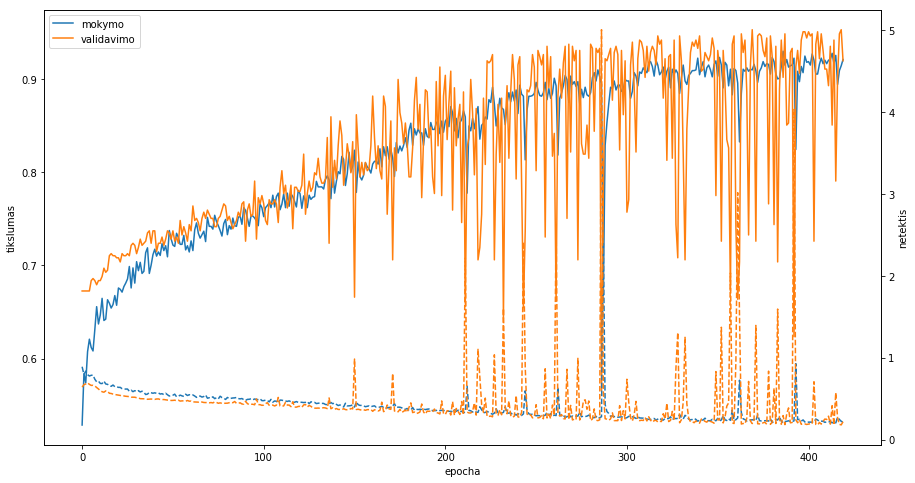

PID: 205.0 TRAIN: 1797 TEST: 48
train: x=(1347, 21, 77, 1) y=(1347, 1)
valid: x=(450, 21, 77, 1) y=(450, 1)
test : x=(48, 21, 77, 1)  y=(48, 1)
Train on 1347 samples, validate on 450 samples
Epoch 1/1000
 - 9s - loss: 0.8792 - acc: 0.5405 - val_loss: 0.6147 - val_acc: 0.7044
Epoch 2/1000
 - 1s - loss: 0.8297 - acc: 0.5761 - val_loss: 0.6214 - val_acc: 0.7044
Epoch 3/1000
 - 1s - loss: 0.7484 - acc: 0.6199 - val_loss: 0.6437 - val_acc: 0.7044
Epoch 4/1000
 - 1s - loss: 0.7581 - acc: 0.6318 - val_loss: 0.6467 - val_acc: 0.7044
Epoch 5/1000
 - 1s - loss: 0.7639 - acc: 0.6459 - val_loss: 0.6556 - val_acc: 0.7089
Epoch 6/1000
 - 1s - loss: 0.7271 - acc: 0.6570 - val_loss: 0.6473 - val_acc: 0.7156
Epoch 7/1000
 - 1s - loss: 0.7479 - acc: 0.6392 - val_loss: 0.6339 - val_acc: 0.7133
Epoch 8/1000
 - 1s - loss: 0.7283 - acc: 0.6488 - val_loss: 0.6169 - val_acc: 0.7133
Epoch 9/1000
 - 1s - loss: 0.7346 - acc: 0.6555 - val_loss: 0.6136 - val_acc: 0.7222
Epoch 10/1000
 - 1s - loss: 0.6747 - acc: 0.

 - 1s - loss: 0.4043 - acc: 0.8099 - val_loss: 0.4521 - val_acc: 0.7978
Epoch 95/1000
 - 1s - loss: 0.3926 - acc: 0.8107 - val_loss: 0.4401 - val_acc: 0.7778
Epoch 96/1000
 - 1s - loss: 0.4070 - acc: 0.7988 - val_loss: 0.4266 - val_acc: 0.8022
Epoch 97/1000
 - 1s - loss: 0.3910 - acc: 0.8166 - val_loss: 0.4277 - val_acc: 0.8000
Epoch 98/1000
 - 1s - loss: 0.3929 - acc: 0.8018 - val_loss: 0.4222 - val_acc: 0.8111
Epoch 99/1000
 - 1s - loss: 0.4004 - acc: 0.8107 - val_loss: 0.4470 - val_acc: 0.8156
Epoch 100/1000
 - 1s - loss: 0.3963 - acc: 0.8092 - val_loss: 0.4454 - val_acc: 0.7800
Epoch 101/1000
 - 1s - loss: 0.4032 - acc: 0.8018 - val_loss: 0.4196 - val_acc: 0.8044
Epoch 102/1000
 - 1s - loss: 0.4013 - acc: 0.8062 - val_loss: 0.4381 - val_acc: 0.7844
Epoch 103/1000
 - 1s - loss: 0.3824 - acc: 0.8174 - val_loss: 0.4181 - val_acc: 0.8089
Epoch 104/1000
 - 1s - loss: 0.3892 - acc: 0.8122 - val_loss: 0.4142 - val_acc: 0.8244
Epoch 105/1000
 - 1s - loss: 0.3922 - acc: 0.8159 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2744 - acc: 0.8968 - val_loss: 1.6819 - val_acc: 0.7133
Epoch 190/1000
 - 1s - loss: 0.3798 - acc: 0.8597 - val_loss: 0.3022 - val_acc: 0.9022
Epoch 191/1000
 - 1s - loss: 0.2652 - acc: 0.8983 - val_loss: 0.3710 - val_acc: 0.8689
Epoch 192/1000
 - 1s - loss: 0.2705 - acc: 0.9087 - val_loss: 0.3050 - val_acc: 0.9111
Epoch 193/1000
 - 1s - loss: 0.2578 - acc: 0.9027 - val_loss: 0.3249 - val_acc: 0.8422
Epoch 194/1000
 - 1s - loss: 0.2731 - acc: 0.8968 - val_loss: 0.3431 - val_acc: 0.8111
Epoch 195/1000
 - 1s - loss: 0.2694 - acc: 0.9013 - val_loss: 1.0097 - val_acc: 0.7511
Epoch 196/1000
 - 1s - loss: 0.2895 - acc: 0.8849 - val_loss: 0.3460 - val_acc: 0.8711
Epoch 197/1000
 - 1s - loss: 0.2810 - acc: 0.8872 - val_loss: 0.3076 - val_acc: 0.8756
Epoch 198/1000
 - 1s - loss: 0.2522 - acc: 0.9013 - val_loss: 0.2889 - val_acc: 0.9289
Epoch 199/1000
 - 1s - loss: 0.2542 - acc: 0.8990 - val_loss: 0.2844 - val_acc: 0.9356
Epoch 200/1000
 - 1s - loss: 0.2680 - acc: 

 - 1s - loss: 0.2133 - acc: 0.9161 - val_loss: 0.2264 - val_acc: 0.9444
Epoch 284/1000
 - 1s - loss: 0.1955 - acc: 0.9250 - val_loss: 0.2472 - val_acc: 0.9289
Epoch 285/1000
 - 1s - loss: 0.1997 - acc: 0.9265 - val_loss: 0.2340 - val_acc: 0.9333
Epoch 286/1000
 - 1s - loss: 0.2177 - acc: 0.9198 - val_loss: 0.2262 - val_acc: 0.9378
Epoch 287/1000
 - 1s - loss: 0.2036 - acc: 0.9198 - val_loss: 0.2971 - val_acc: 0.9044
Epoch 288/1000
 - 1s - loss: 0.2272 - acc: 0.9183 - val_loss: 0.2411 - val_acc: 0.9222
Epoch 289/1000
 - 1s - loss: 0.2222 - acc: 0.9154 - val_loss: 0.2387 - val_acc: 0.9356
Epoch 290/1000
 - 1s - loss: 0.2044 - acc: 0.9220 - val_loss: 0.2635 - val_acc: 0.9133
Epoch 291/1000
 - 1s - loss: 0.2293 - acc: 0.9065 - val_loss: 0.2258 - val_acc: 0.9378
Epoch 292/1000
 - 1s - loss: 0.2000 - acc: 0.9161 - val_loss: 0.2557 - val_acc: 0.9267
Epoch 293/1000
 - 1s - loss: 0.2139 - acc: 0.9124 - val_loss: 0.2241 - val_acc: 0.9467
Epoch 294/1000
 - 1s - loss: 0.1917 - acc: 0.9339 - val_lo

Epoch 378/1000
 - 1s - loss: 0.1808 - acc: 0.9258 - val_loss: 0.2215 - val_acc: 0.9267
Epoch 379/1000
 - 1s - loss: 0.2201 - acc: 0.9169 - val_loss: 0.2057 - val_acc: 0.9489
Epoch 380/1000
 - 1s - loss: 0.1886 - acc: 0.9265 - val_loss: 0.2267 - val_acc: 0.9333
Epoch 381/1000
 - 1s - loss: 0.1855 - acc: 0.9265 - val_loss: 0.2599 - val_acc: 0.8933
Epoch 382/1000
 - 1s - loss: 0.1922 - acc: 0.9272 - val_loss: 0.3526 - val_acc: 0.8778
Epoch 383/1000
 - 1s - loss: 0.2241 - acc: 0.9124 - val_loss: 0.6733 - val_acc: 0.8333
Epoch 384/1000
 - 1s - loss: 0.2752 - acc: 0.8924 - val_loss: 0.2472 - val_acc: 0.9244
Restoring model weights from the end of the best epoch
Epoch 00384: early stopping
48/48 [==============================] - 0s 112us/step
Testing:
loss = 0.4956017732620239
acc = 0.7916666666666666


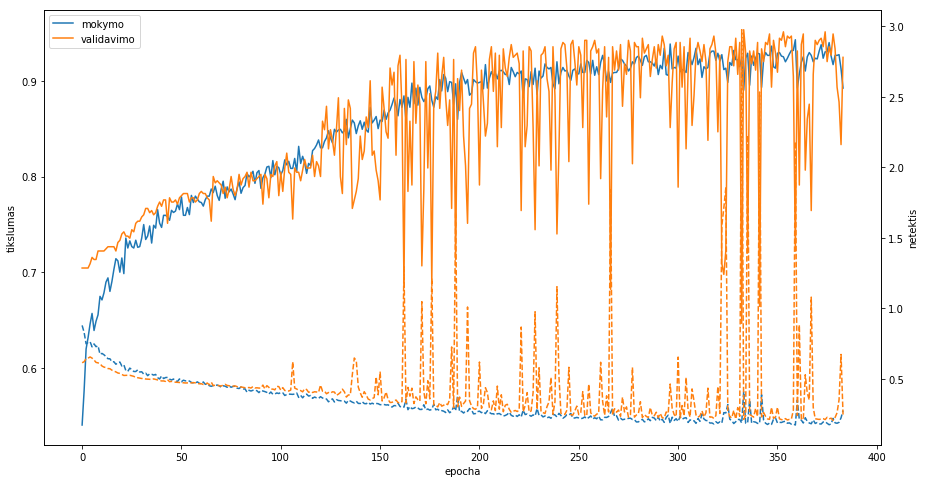

PID: 8.0 TRAIN: 1798 TEST: 47
train: x=(1348, 21, 77, 1) y=(1348, 1)
valid: x=(450, 21, 77, 1) y=(450, 1)
test : x=(47, 21, 77, 1)  y=(47, 1)
Train on 1348 samples, validate on 450 samples
Epoch 1/1000
 - 9s - loss: 0.8559 - acc: 0.5482 - val_loss: 0.6595 - val_acc: 0.6800
Epoch 2/1000
 - 1s - loss: 0.8159 - acc: 0.5734 - val_loss: 0.6569 - val_acc: 0.6778
Epoch 3/1000
 - 1s - loss: 0.8188 - acc: 0.5823 - val_loss: 0.6605 - val_acc: 0.6778
Epoch 4/1000
 - 1s - loss: 0.8236 - acc: 0.5816 - val_loss: 0.6676 - val_acc: 0.6778
Epoch 5/1000
 - 1s - loss: 0.7796 - acc: 0.6135 - val_loss: 0.6642 - val_acc: 0.6778
Epoch 6/1000
 - 1s - loss: 0.7715 - acc: 0.5979 - val_loss: 0.6565 - val_acc: 0.6778
Epoch 7/1000
 - 1s - loss: 0.7787 - acc: 0.6039 - val_loss: 0.6552 - val_acc: 0.6778
Epoch 8/1000
 - 1s - loss: 0.7404 - acc: 0.6328 - val_loss: 0.6571 - val_acc: 0.6778
Epoch 9/1000
 - 1s - loss: 0.7431 - acc: 0.6276 - val_loss: 0.6335 - val_acc: 0.6778
Epoch 10/1000
 - 1s - loss: 0.7240 - acc: 0.61

Epoch 95/1000
 - 1s - loss: 0.4541 - acc: 0.7730 - val_loss: 0.4133 - val_acc: 0.7956
Epoch 96/1000
 - 1s - loss: 0.4364 - acc: 0.7990 - val_loss: 0.4177 - val_acc: 0.7956
Epoch 97/1000
 - 1s - loss: 0.4322 - acc: 0.7938 - val_loss: 0.4248 - val_acc: 0.8156
Epoch 98/1000
 - 1s - loss: 0.4363 - acc: 0.7826 - val_loss: 0.4134 - val_acc: 0.7956
Epoch 99/1000
 - 1s - loss: 0.4394 - acc: 0.7849 - val_loss: 0.4094 - val_acc: 0.7978
Epoch 100/1000
 - 1s - loss: 0.4333 - acc: 0.7915 - val_loss: 0.4058 - val_acc: 0.7978
Epoch 101/1000
 - 1s - loss: 0.4386 - acc: 0.7849 - val_loss: 0.4073 - val_acc: 0.7956
Epoch 102/1000
 - 1s - loss: 0.4373 - acc: 0.7841 - val_loss: 0.4088 - val_acc: 0.8111
Epoch 103/1000
 - 1s - loss: 0.4468 - acc: 0.7990 - val_loss: 0.4092 - val_acc: 0.7889
Epoch 104/1000
 - 1s - loss: 0.4268 - acc: 0.8027 - val_loss: 0.4186 - val_acc: 0.8111
Epoch 105/1000
 - 1s - loss: 0.4464 - acc: 0.7908 - val_loss: 0.4049 - val_acc: 0.7956
Epoch 106/1000
 - 1s - loss: 0.4199 - acc: 0.800

Epoch 190/1000
 - 1s - loss: 0.3130 - acc: 0.8739 - val_loss: 0.2931 - val_acc: 0.9089
Epoch 191/1000
 - 1s - loss: 0.3028 - acc: 0.8902 - val_loss: 0.3017 - val_acc: 0.8778
Epoch 192/1000
 - 1s - loss: 0.2990 - acc: 0.8902 - val_loss: 0.3607 - val_acc: 0.8622
Epoch 193/1000
 - 1s - loss: 0.3082 - acc: 0.8769 - val_loss: 0.3200 - val_acc: 0.8911
Epoch 194/1000
 - 1s - loss: 0.3038 - acc: 0.8895 - val_loss: 1.7635 - val_acc: 0.6689
Epoch 195/1000
 - 1s - loss: 0.4064 - acc: 0.8628 - val_loss: 0.2891 - val_acc: 0.9089
Epoch 196/1000
 - 1s - loss: 0.3129 - acc: 0.8783 - val_loss: 0.3012 - val_acc: 0.8911
Epoch 197/1000
 - 1s - loss: 0.2997 - acc: 0.8806 - val_loss: 0.2825 - val_acc: 0.9089
Epoch 198/1000
 - 1s - loss: 0.3030 - acc: 0.8895 - val_loss: 0.3150 - val_acc: 0.8844
Restoring model weights from the end of the best epoch
Epoch 00198: early stopping
47/47 [==============================] - 0s 122us/step
Testing:
loss = 0.019388362210481725
acc = 1.0


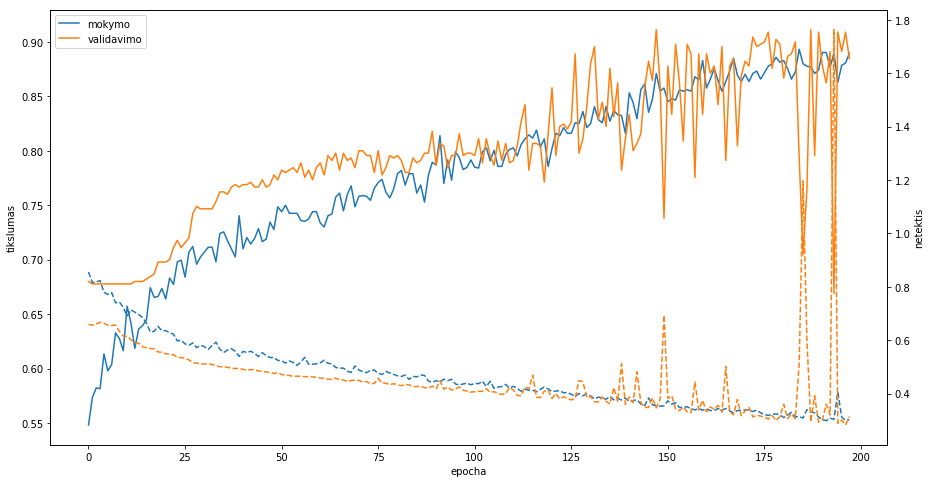

PID: 219.0 TRAIN: 1801 TEST: 44
train: x=(1350, 21, 77, 1) y=(1350, 1)
valid: x=(451, 21, 77, 1) y=(451, 1)
test : x=(44, 21, 77, 1)  y=(44, 1)
Train on 1350 samples, validate on 451 samples
Epoch 1/1000
 - 9s - loss: 0.9005 - acc: 0.5230 - val_loss: 0.6032 - val_acc: 0.7162
Epoch 2/1000
 - 1s - loss: 0.7988 - acc: 0.5770 - val_loss: 0.6234 - val_acc: 0.7162
Epoch 3/1000
 - 1s - loss: 0.7334 - acc: 0.6311 - val_loss: 0.6278 - val_acc: 0.7162
Epoch 4/1000
 - 1s - loss: 0.7671 - acc: 0.6200 - val_loss: 0.6340 - val_acc: 0.7162
Epoch 5/1000
 - 1s - loss: 0.7615 - acc: 0.6200 - val_loss: 0.6191 - val_acc: 0.7162
Epoch 6/1000
 - 1s - loss: 0.7755 - acc: 0.6067 - val_loss: 0.6189 - val_acc: 0.7162
Epoch 7/1000
 - 1s - loss: 0.7071 - acc: 0.6578 - val_loss: 0.6084 - val_acc: 0.7162
Epoch 8/1000
 - 1s - loss: 0.7124 - acc: 0.6385 - val_loss: 0.6038 - val_acc: 0.7162
Epoch 9/1000
 - 1s - loss: 0.7198 - acc: 0.6526 - val_loss: 0.5967 - val_acc: 0.7162
Epoch 10/1000
 - 1s - loss: 0.6960 - acc: 0.

 - 1s - loss: 0.4215 - acc: 0.8052 - val_loss: 0.3537 - val_acc: 0.8160
Epoch 95/1000
 - 1s - loss: 0.4181 - acc: 0.8074 - val_loss: 0.3573 - val_acc: 0.8182
Epoch 96/1000
 - 1s - loss: 0.4070 - acc: 0.8119 - val_loss: 0.3582 - val_acc: 0.8359
Epoch 97/1000
 - 1s - loss: 0.3975 - acc: 0.8170 - val_loss: 0.3535 - val_acc: 0.8647
Epoch 98/1000
 - 1s - loss: 0.3875 - acc: 0.8281 - val_loss: 0.3459 - val_acc: 0.8271
Epoch 99/1000
 - 1s - loss: 0.3988 - acc: 0.8148 - val_loss: 0.3554 - val_acc: 0.8803
Epoch 100/1000
 - 1s - loss: 0.3825 - acc: 0.8319 - val_loss: 0.3429 - val_acc: 0.8293
Epoch 101/1000
 - 1s - loss: 0.4028 - acc: 0.8111 - val_loss: 0.3411 - val_acc: 0.8337
Epoch 102/1000
 - 1s - loss: 0.3996 - acc: 0.8200 - val_loss: 0.3418 - val_acc: 0.8204
Epoch 103/1000
 - 1s - loss: 0.3873 - acc: 0.8244 - val_loss: 0.3390 - val_acc: 0.8359
Epoch 104/1000
 - 1s - loss: 0.3965 - acc: 0.8230 - val_loss: 0.3349 - val_acc: 0.8359
Epoch 105/1000
 - 1s - loss: 0.3880 - acc: 0.8244 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2682 - acc: 0.9081 - val_loss: 0.3199 - val_acc: 0.8914
Epoch 190/1000
 - 1s - loss: 0.2629 - acc: 0.9052 - val_loss: 0.2894 - val_acc: 0.8758
Epoch 191/1000
 - 1s - loss: 0.2631 - acc: 0.9119 - val_loss: 0.2650 - val_acc: 0.9113
Epoch 192/1000
 - 1s - loss: 0.3037 - acc: 0.8815 - val_loss: 0.2358 - val_acc: 0.9357
Epoch 193/1000
 - 1s - loss: 0.2753 - acc: 0.8881 - val_loss: 0.6602 - val_acc: 0.7738
Epoch 194/1000
 - 1s - loss: 0.2802 - acc: 0.9044 - val_loss: 0.2525 - val_acc: 0.9202
Epoch 195/1000
 - 1s - loss: 0.2524 - acc: 0.9074 - val_loss: 0.2375 - val_acc: 0.9224
Epoch 196/1000
 - 1s - loss: 0.2617 - acc: 0.9096 - val_loss: 0.2229 - val_acc: 0.9424
Epoch 197/1000
 - 1s - loss: 0.2490 - acc: 0.9096 - val_loss: 0.2151 - val_acc: 0.9557
Epoch 198/1000
 - 1s - loss: 0.2549 - acc: 0.9104 - val_loss: 0.2673 - val_acc: 0.8559
Epoch 199/1000
 - 1s - loss: 0.2484 - acc: 0.9156 - val_loss: 0.2149 - val_acc: 0.9512
Epoch 200/1000
 - 1s - loss: 0.2530 - acc: 

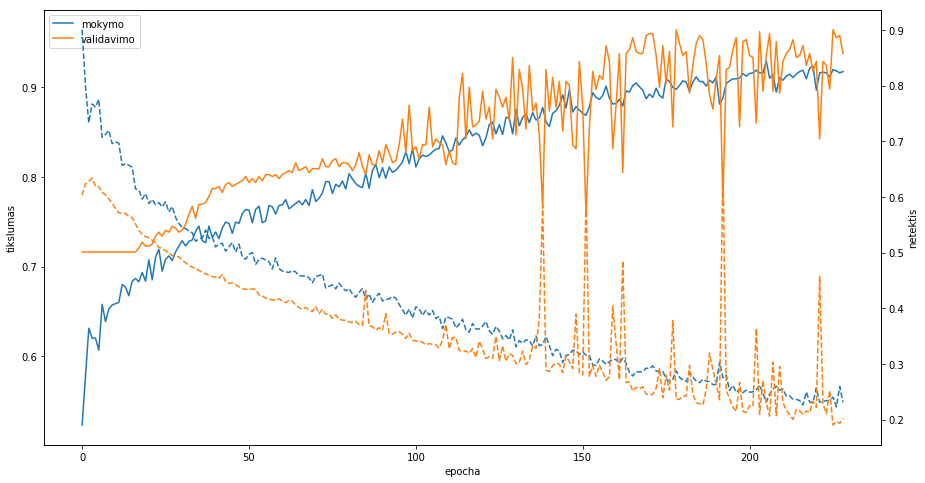

PID: 12.0 TRAIN: 1814 TEST: 31
train: x=(1360, 21, 77, 1) y=(1360, 1)
valid: x=(454, 21, 77, 1) y=(454, 1)
test : x=(31, 21, 77, 1)  y=(31, 1)
Train on 1360 samples, validate on 454 samples
Epoch 1/1000
 - 9s - loss: 0.9071 - acc: 0.5221 - val_loss: 0.6364 - val_acc: 0.7026
Epoch 2/1000
 - 1s - loss: 0.8398 - acc: 0.5750 - val_loss: 0.6337 - val_acc: 0.7026
Epoch 3/1000
 - 1s - loss: 0.7901 - acc: 0.6147 - val_loss: 0.6439 - val_acc: 0.7026
Epoch 4/1000
 - 1s - loss: 0.8028 - acc: 0.5978 - val_loss: 0.6379 - val_acc: 0.7026
Epoch 5/1000
 - 1s - loss: 0.7998 - acc: 0.5934 - val_loss: 0.6390 - val_acc: 0.7026
Epoch 6/1000
 - 1s - loss: 0.7845 - acc: 0.6096 - val_loss: 0.6221 - val_acc: 0.7026
Epoch 7/1000
 - 1s - loss: 0.7768 - acc: 0.6287 - val_loss: 0.6136 - val_acc: 0.7026
Epoch 8/1000
 - 1s - loss: 0.7605 - acc: 0.6125 - val_loss: 0.6077 - val_acc: 0.7026
Epoch 9/1000
 - 1s - loss: 0.7300 - acc: 0.6346 - val_loss: 0.5990 - val_acc: 0.7026
Epoch 10/1000
 - 1s - loss: 0.7668 - acc: 0.6

 - 1s - loss: 0.4444 - acc: 0.7838 - val_loss: 0.3921 - val_acc: 0.8238
Epoch 95/1000
 - 1s - loss: 0.4500 - acc: 0.7846 - val_loss: 0.3844 - val_acc: 0.8216
Epoch 96/1000
 - 1s - loss: 0.4569 - acc: 0.7757 - val_loss: 0.3811 - val_acc: 0.8238
Epoch 97/1000
 - 1s - loss: 0.4490 - acc: 0.7809 - val_loss: 0.3831 - val_acc: 0.8062
Epoch 98/1000
 - 1s - loss: 0.4505 - acc: 0.7787 - val_loss: 0.3800 - val_acc: 0.8238
Epoch 99/1000
 - 1s - loss: 0.4426 - acc: 0.7912 - val_loss: 0.3869 - val_acc: 0.8062
Epoch 100/1000
 - 1s - loss: 0.4316 - acc: 0.7956 - val_loss: 0.3731 - val_acc: 0.8194
Epoch 101/1000
 - 1s - loss: 0.4378 - acc: 0.7897 - val_loss: 0.3745 - val_acc: 0.8238
Epoch 102/1000
 - 1s - loss: 0.4388 - acc: 0.7882 - val_loss: 0.3719 - val_acc: 0.8216
Epoch 103/1000
 - 1s - loss: 0.4431 - acc: 0.7926 - val_loss: 0.3758 - val_acc: 0.8238
Epoch 104/1000
 - 1s - loss: 0.4082 - acc: 0.8059 - val_loss: 0.3804 - val_acc: 0.8106
Epoch 105/1000
 - 1s - loss: 0.4256 - acc: 0.8051 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2879 - acc: 0.8890 - val_loss: 0.2924 - val_acc: 0.9119
Epoch 190/1000
 - 1s - loss: 0.2891 - acc: 0.8963 - val_loss: 0.2483 - val_acc: 0.9427
Epoch 191/1000
 - 1s - loss: 0.2802 - acc: 0.8978 - val_loss: 0.2479 - val_acc: 0.9471
Epoch 192/1000
 - 1s - loss: 0.2983 - acc: 0.8801 - val_loss: 0.3587 - val_acc: 0.8811
Epoch 193/1000
 - 1s - loss: 0.2897 - acc: 0.8919 - val_loss: 0.2876 - val_acc: 0.8965
Epoch 194/1000
 - 1s - loss: 0.2905 - acc: 0.8963 - val_loss: 0.3333 - val_acc: 0.8722
Epoch 195/1000
 - 1s - loss: 0.2871 - acc: 0.9029 - val_loss: 0.2433 - val_acc: 0.9427
Epoch 196/1000
 - 1s - loss: 0.2788 - acc: 0.8949 - val_loss: 0.2450 - val_acc: 0.9427
Epoch 197/1000
 - 1s - loss: 0.2953 - acc: 0.8890 - val_loss: 0.4641 - val_acc: 0.7974
Epoch 198/1000
 - 1s - loss: 0.2944 - acc: 0.8904 - val_loss: 0.2399 - val_acc: 0.9471
Epoch 199/1000
 - 1s - loss: 0.2936 - acc: 0.8897 - val_loss: 0.2485 - val_acc: 0.9427
Epoch 200/1000
 - 1s - loss: 0.2918 - acc: 

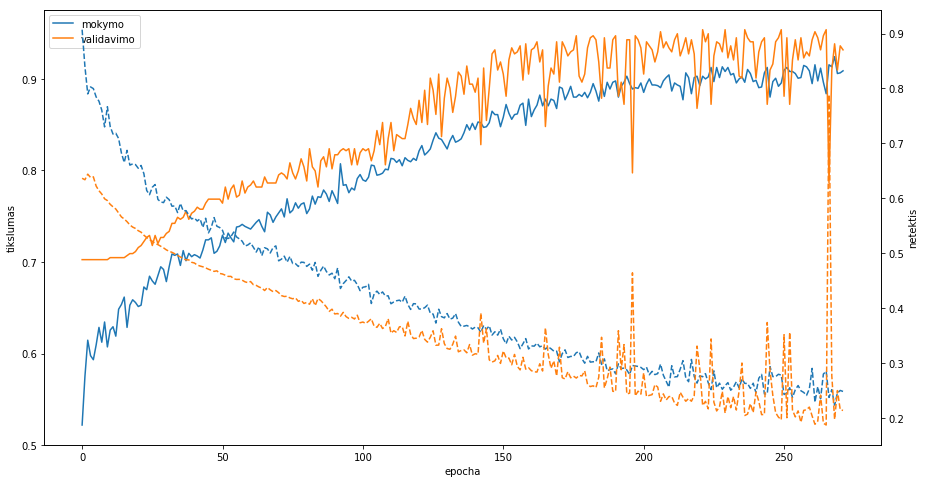

PID: 209.0 TRAIN: 1826 TEST: 19
train: x=(1369, 21, 77, 1) y=(1369, 1)
valid: x=(457, 21, 77, 1) y=(457, 1)
test : x=(19, 21, 77, 1)  y=(19, 1)
Train on 1369 samples, validate on 457 samples
Epoch 1/1000
 - 9s - loss: 0.8714 - acc: 0.5405 - val_loss: 0.6477 - val_acc: 0.6805
Epoch 2/1000
 - 1s - loss: 0.8387 - acc: 0.5931 - val_loss: 0.6829 - val_acc: 0.6805
Epoch 3/1000
 - 1s - loss: 0.7967 - acc: 0.6070 - val_loss: 0.7239 - val_acc: 0.6805
Epoch 4/1000
 - 1s - loss: 0.7707 - acc: 0.6165 - val_loss: 0.7304 - val_acc: 0.6805
Epoch 5/1000
 - 1s - loss: 0.7839 - acc: 0.6340 - val_loss: 0.7295 - val_acc: 0.6805
Epoch 6/1000
 - 1s - loss: 0.7456 - acc: 0.6435 - val_loss: 0.7316 - val_acc: 0.6805
Epoch 7/1000
 - 1s - loss: 0.7522 - acc: 0.6311 - val_loss: 0.7323 - val_acc: 0.6805
Epoch 8/1000
 - 1s - loss: 0.7311 - acc: 0.6413 - val_loss: 0.7256 - val_acc: 0.6805
Epoch 9/1000
 - 1s - loss: 0.7317 - acc: 0.6297 - val_loss: 0.7053 - val_acc: 0.6805
Epoch 10/1000
 - 1s - loss: 0.7366 - acc: 0.

 - 1s - loss: 0.4483 - acc: 0.7940 - val_loss: 0.4584 - val_acc: 0.7790
Epoch 95/1000
 - 1s - loss: 0.4446 - acc: 0.7823 - val_loss: 0.4316 - val_acc: 0.7856
Epoch 96/1000
 - 1s - loss: 0.4364 - acc: 0.7889 - val_loss: 0.4305 - val_acc: 0.7899
Epoch 97/1000
 - 1s - loss: 0.4418 - acc: 0.7816 - val_loss: 0.4375 - val_acc: 0.7877
Epoch 98/1000
 - 1s - loss: 0.4411 - acc: 0.7838 - val_loss: 0.4301 - val_acc: 0.7877
Epoch 99/1000
 - 1s - loss: 0.4384 - acc: 0.7933 - val_loss: 0.4264 - val_acc: 0.7877
Epoch 100/1000
 - 1s - loss: 0.4403 - acc: 0.7947 - val_loss: 0.4346 - val_acc: 0.7921
Epoch 101/1000
 - 1s - loss: 0.4309 - acc: 0.7977 - val_loss: 0.4304 - val_acc: 0.7877
Epoch 102/1000
 - 1s - loss: 0.4274 - acc: 0.7962 - val_loss: 0.4277 - val_acc: 0.7877
Epoch 103/1000
 - 1s - loss: 0.4262 - acc: 0.7940 - val_loss: 0.4203 - val_acc: 0.7921
Epoch 104/1000
 - 1s - loss: 0.4326 - acc: 0.7925 - val_loss: 0.4190 - val_acc: 0.7899
Epoch 105/1000
 - 1s - loss: 0.4204 - acc: 0.8072 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3155 - acc: 0.8700 - val_loss: 0.3210 - val_acc: 0.8534
Epoch 190/1000
 - 1s - loss: 0.3261 - acc: 0.8656 - val_loss: 0.3025 - val_acc: 0.9168
Epoch 191/1000
 - 1s - loss: 0.3287 - acc: 0.8671 - val_loss: 0.3030 - val_acc: 0.9081
Epoch 192/1000
 - 1s - loss: 0.3052 - acc: 0.8926 - val_loss: 0.3579 - val_acc: 0.8643
Epoch 193/1000
 - 1s - loss: 0.3237 - acc: 0.8714 - val_loss: 0.3211 - val_acc: 0.8490
Epoch 194/1000
 - 1s - loss: 0.3091 - acc: 0.8773 - val_loss: 0.3254 - val_acc: 0.8775
Epoch 195/1000
 - 1s - loss: 0.3177 - acc: 0.8714 - val_loss: 0.3418 - val_acc: 0.8818
Epoch 196/1000
 - 1s - loss: 0.3111 - acc: 0.8656 - val_loss: 0.3082 - val_acc: 0.8928
Epoch 197/1000
 - 1s - loss: 0.3014 - acc: 0.8780 - val_loss: 0.2910 - val_acc: 0.9212
Epoch 198/1000
 - 1s - loss: 0.3019 - acc: 0.8890 - val_loss: 0.2981 - val_acc: 0.9168
Epoch 199/1000
 - 1s - loss: 0.3086 - acc: 0.8802 - val_loss: 0.2984 - val_acc: 0.9103
Epoch 200/1000
 - 1s - loss: 0.3145 - acc: 

 - 1s - loss: 0.2464 - acc: 0.9087 - val_loss: 0.2183 - val_acc: 0.9322
Epoch 284/1000
 - 1s - loss: 0.2534 - acc: 0.9050 - val_loss: 0.2096 - val_acc: 0.9278
Epoch 285/1000
 - 1s - loss: 0.2431 - acc: 0.9109 - val_loss: 0.2600 - val_acc: 0.9190
Epoch 286/1000
 - 1s - loss: 0.2462 - acc: 0.9175 - val_loss: 0.2381 - val_acc: 0.9300
Epoch 287/1000
 - 1s - loss: 0.2304 - acc: 0.9189 - val_loss: 0.3198 - val_acc: 0.8796
Epoch 288/1000
 - 1s - loss: 0.2319 - acc: 0.9138 - val_loss: 0.2138 - val_acc: 0.9322
Epoch 289/1000
 - 1s - loss: 0.2876 - acc: 0.8977 - val_loss: 0.2136 - val_acc: 0.9322
Epoch 290/1000
 - 1s - loss: 0.2245 - acc: 0.9248 - val_loss: 0.2110 - val_acc: 0.9387
Epoch 291/1000
 - 1s - loss: 0.2441 - acc: 0.9123 - val_loss: 0.2050 - val_acc: 0.9300
Epoch 292/1000
 - 1s - loss: 0.2446 - acc: 0.9109 - val_loss: 0.2169 - val_acc: 0.9322
Epoch 293/1000
 - 1s - loss: 0.2322 - acc: 0.9080 - val_loss: 0.2241 - val_acc: 0.9365
Epoch 294/1000
 - 1s - loss: 0.2275 - acc: 0.9153 - val_lo

Epoch 378/1000
 - 1s - loss: 0.2188 - acc: 0.9240 - val_loss: 0.1764 - val_acc: 0.9387
Epoch 379/1000
 - 1s - loss: 0.2062 - acc: 0.9270 - val_loss: 0.2255 - val_acc: 0.9256
Epoch 380/1000
 - 1s - loss: 0.2192 - acc: 0.9211 - val_loss: 0.2985 - val_acc: 0.8862
Epoch 381/1000
 - 1s - loss: 0.2245 - acc: 0.9167 - val_loss: 0.2103 - val_acc: 0.9278
Epoch 382/1000
 - 1s - loss: 0.2087 - acc: 0.9189 - val_loss: 0.1740 - val_acc: 0.9431
Epoch 383/1000
 - 1s - loss: 0.2044 - acc: 0.9189 - val_loss: 0.1913 - val_acc: 0.9365
Epoch 384/1000
 - 1s - loss: 0.2033 - acc: 0.9277 - val_loss: 0.1765 - val_acc: 0.9344
Epoch 385/1000
 - 1s - loss: 0.2135 - acc: 0.9167 - val_loss: 0.1977 - val_acc: 0.9540
Epoch 386/1000
 - 1s - loss: 0.2421 - acc: 0.9102 - val_loss: 0.1918 - val_acc: 0.9453
Epoch 387/1000
 - 1s - loss: 0.2149 - acc: 0.9262 - val_loss: 0.1854 - val_acc: 0.9322
Epoch 388/1000
 - 1s - loss: 0.2366 - acc: 0.9094 - val_loss: 0.1887 - val_acc: 0.9475
Epoch 389/1000
 - 1s - loss: 0.2029 - acc: 

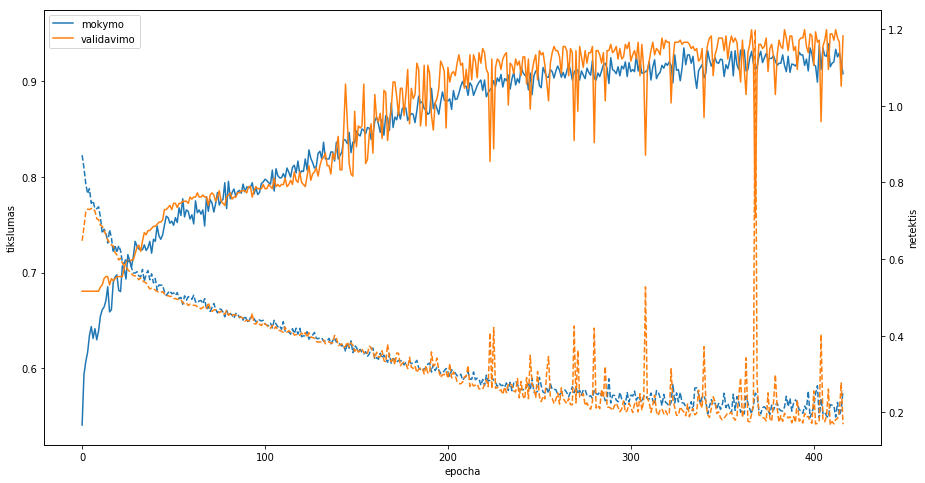

PID: 2.0 TRAIN: 1838 TEST: 7
train: x=(1378, 21, 77, 1) y=(1378, 1)
valid: x=(460, 21, 77, 1) y=(460, 1)
test : x=(7, 21, 77, 1)  y=(7, 1)
Train on 1378 samples, validate on 460 samples
Epoch 1/1000
 - 9s - loss: 0.8744 - acc: 0.5581 - val_loss: 0.6523 - val_acc: 0.6957
Epoch 2/1000
 - 1s - loss: 0.8817 - acc: 0.5617 - val_loss: 0.7041 - val_acc: 0.6935
Epoch 3/1000
 - 1s - loss: 0.7756 - acc: 0.6219 - val_loss: 0.6599 - val_acc: 0.6935
Epoch 4/1000
 - 1s - loss: 0.7964 - acc: 0.5965 - val_loss: 0.6633 - val_acc: 0.6935
Epoch 5/1000
 - 1s - loss: 0.7892 - acc: 0.6001 - val_loss: 0.6561 - val_acc: 0.6935
Epoch 6/1000
 - 1s - loss: 0.7647 - acc: 0.6132 - val_loss: 0.6551 - val_acc: 0.6935
Epoch 7/1000
 - 1s - loss: 0.7542 - acc: 0.6219 - val_loss: 0.6265 - val_acc: 0.6935
Epoch 8/1000
 - 1s - loss: 0.7224 - acc: 0.6284 - val_loss: 0.6033 - val_acc: 0.6935
Epoch 9/1000
 - 1s - loss: 0.7312 - acc: 0.6190 - val_loss: 0.5914 - val_acc: 0.6935
Epoch 10/1000
 - 1s - loss: 0.7197 - acc: 0.6284 

Epoch 95/1000
 - 1s - loss: 0.4372 - acc: 0.7939 - val_loss: 0.3847 - val_acc: 0.7978
Epoch 96/1000
 - 1s - loss: 0.4457 - acc: 0.7772 - val_loss: 0.3895 - val_acc: 0.7957
Epoch 97/1000
 - 1s - loss: 0.4329 - acc: 0.7939 - val_loss: 0.4100 - val_acc: 0.7935
Epoch 98/1000
 - 1s - loss: 0.4321 - acc: 0.8012 - val_loss: 0.3891 - val_acc: 0.8022
Epoch 99/1000
 - 1s - loss: 0.4383 - acc: 0.7961 - val_loss: 0.3907 - val_acc: 0.8196
Epoch 100/1000
 - 1s - loss: 0.4365 - acc: 0.7881 - val_loss: 0.3763 - val_acc: 0.7935
Epoch 101/1000
 - 1s - loss: 0.4253 - acc: 0.7990 - val_loss: 0.3765 - val_acc: 0.7935
Epoch 102/1000
 - 1s - loss: 0.4409 - acc: 0.7881 - val_loss: 0.4635 - val_acc: 0.7500
Epoch 103/1000
 - 1s - loss: 0.4430 - acc: 0.7874 - val_loss: 0.3764 - val_acc: 0.7957
Epoch 104/1000
 - 1s - loss: 0.4408 - acc: 0.7925 - val_loss: 0.4248 - val_acc: 0.8109
Epoch 105/1000
 - 1s - loss: 0.4364 - acc: 0.7874 - val_loss: 0.3796 - val_acc: 0.8000
Epoch 106/1000
 - 1s - loss: 0.4258 - acc: 0.801

Epoch 190/1000
 - 1s - loss: 0.3185 - acc: 0.8810 - val_loss: 0.2526 - val_acc: 0.9043
Epoch 191/1000
 - 1s - loss: 0.3099 - acc: 0.9013 - val_loss: 0.3070 - val_acc: 0.8652
Epoch 192/1000
 - 1s - loss: 0.3028 - acc: 0.8897 - val_loss: 0.4321 - val_acc: 0.8000
Epoch 193/1000
 - 1s - loss: 0.3165 - acc: 0.8904 - val_loss: 0.2504 - val_acc: 0.8978
Epoch 194/1000
 - 1s - loss: 0.3161 - acc: 0.8911 - val_loss: 0.2903 - val_acc: 0.8609
Epoch 195/1000
 - 1s - loss: 0.3058 - acc: 0.8846 - val_loss: 0.4334 - val_acc: 0.8065
Epoch 196/1000
 - 1s - loss: 0.3161 - acc: 0.8788 - val_loss: 0.3232 - val_acc: 0.8696
Epoch 197/1000
 - 1s - loss: 0.2949 - acc: 0.9093 - val_loss: 0.3277 - val_acc: 0.8457
Epoch 198/1000
 - 1s - loss: 0.3116 - acc: 0.8926 - val_loss: 0.2458 - val_acc: 0.9022
Epoch 199/1000
 - 1s - loss: 0.3070 - acc: 0.8882 - val_loss: 0.2436 - val_acc: 0.9065
Epoch 200/1000
 - 1s - loss: 0.2930 - acc: 0.8861 - val_loss: 0.3243 - val_acc: 0.8761
Epoch 201/1000
 - 1s - loss: 0.3057 - acc: 

 - 1s - loss: 0.2256 - acc: 0.9340 - val_loss: 0.1805 - val_acc: 0.9370
Epoch 285/1000
 - 1s - loss: 0.2400 - acc: 0.9180 - val_loss: 0.1861 - val_acc: 0.9326
Epoch 286/1000
 - 1s - loss: 0.2414 - acc: 0.9209 - val_loss: 0.2320 - val_acc: 0.8761
Epoch 287/1000
 - 1s - loss: 0.2339 - acc: 0.9093 - val_loss: 0.1837 - val_acc: 0.9152
Epoch 288/1000
 - 1s - loss: 0.2643 - acc: 0.9173 - val_loss: 0.1924 - val_acc: 0.9196
Epoch 289/1000
 - 1s - loss: 0.2570 - acc: 0.9057 - val_loss: 0.1935 - val_acc: 0.9196
Epoch 290/1000
 - 1s - loss: 0.2363 - acc: 0.9136 - val_loss: 0.3545 - val_acc: 0.8174
Epoch 291/1000
 - 1s - loss: 0.2355 - acc: 0.9144 - val_loss: 0.1787 - val_acc: 0.9348
Epoch 292/1000
 - 1s - loss: 0.2264 - acc: 0.9238 - val_loss: 0.4283 - val_acc: 0.8348
Epoch 293/1000
 - 1s - loss: 0.2248 - acc: 0.9274 - val_loss: 0.5935 - val_acc: 0.7978
Epoch 294/1000
 - 1s - loss: 0.2544 - acc: 0.9107 - val_loss: 0.1721 - val_acc: 0.9304
Epoch 295/1000
 - 1s - loss: 0.2236 - acc: 0.9267 - val_lo

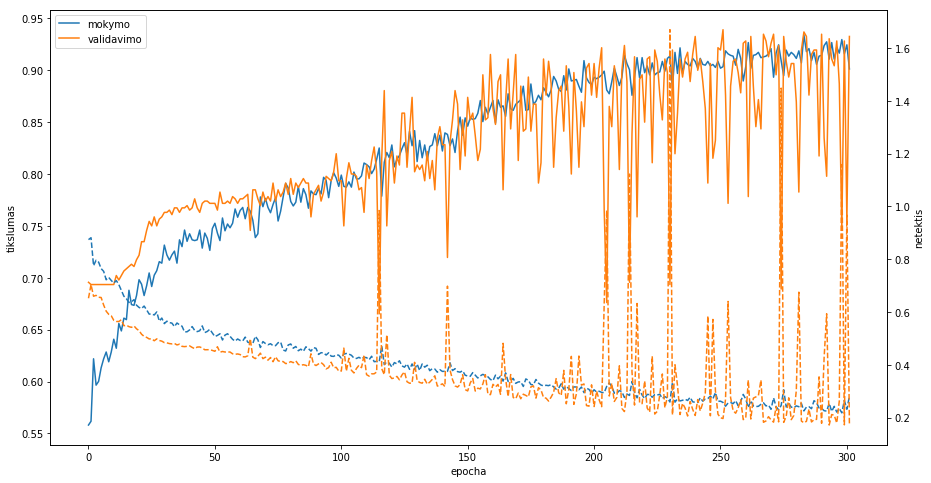

PID: 207.0 TRAIN: 1842 TEST: 3
train: x=(1381, 21, 77, 1) y=(1381, 1)
valid: x=(461, 21, 77, 1) y=(461, 1)
test : x=(3, 21, 77, 1)  y=(3, 1)
Train on 1381 samples, validate on 461 samples
Epoch 1/1000
 - 9s - loss: 0.8345 - acc: 0.5474 - val_loss: 0.6404 - val_acc: 0.6855
Epoch 2/1000
 - 1s - loss: 0.8057 - acc: 0.5634 - val_loss: 0.6551 - val_acc: 0.6855
Epoch 3/1000
 - 1s - loss: 0.7646 - acc: 0.6039 - val_loss: 0.6674 - val_acc: 0.6855
Epoch 4/1000
 - 1s - loss: 0.7826 - acc: 0.6119 - val_loss: 0.6746 - val_acc: 0.6855
Epoch 5/1000
 - 1s - loss: 0.7418 - acc: 0.6293 - val_loss: 0.6665 - val_acc: 0.6855
Epoch 6/1000
 - 1s - loss: 0.7687 - acc: 0.6184 - val_loss: 0.6599 - val_acc: 0.6855
Epoch 7/1000
 - 1s - loss: 0.7177 - acc: 0.6350 - val_loss: 0.6633 - val_acc: 0.6855
Epoch 8/1000
 - 1s - loss: 0.7093 - acc: 0.6459 - val_loss: 0.6510 - val_acc: 0.6876
Epoch 9/1000
 - 1s - loss: 0.6741 - acc: 0.6553 - val_loss: 0.6450 - val_acc: 0.6855
Epoch 10/1000
 - 1s - loss: 0.6941 - acc: 0.640

Epoch 95/1000
 - 1s - loss: 0.4136 - acc: 0.7929 - val_loss: 0.3768 - val_acc: 0.8438
Epoch 96/1000
 - 1s - loss: 0.4018 - acc: 0.8059 - val_loss: 0.4010 - val_acc: 0.7744
Epoch 97/1000
 - 1s - loss: 0.3955 - acc: 0.7994 - val_loss: 0.3760 - val_acc: 0.8069
Epoch 98/1000
 - 1s - loss: 0.3951 - acc: 0.8233 - val_loss: 0.3803 - val_acc: 0.8178
Epoch 99/1000
 - 1s - loss: 0.3934 - acc: 0.8211 - val_loss: 0.4546 - val_acc: 0.8091
Epoch 100/1000
 - 1s - loss: 0.3946 - acc: 0.8219 - val_loss: 0.3765 - val_acc: 0.8004
Epoch 101/1000
 - 1s - loss: 0.4082 - acc: 0.8117 - val_loss: 0.3709 - val_acc: 0.8048
Epoch 102/1000
 - 1s - loss: 0.3791 - acc: 0.8262 - val_loss: 0.4347 - val_acc: 0.7657
Epoch 103/1000
 - 1s - loss: 0.3907 - acc: 0.8154 - val_loss: 0.3616 - val_acc: 0.8460
Epoch 104/1000
 - 1s - loss: 0.3816 - acc: 0.8175 - val_loss: 0.3634 - val_acc: 0.8004
Epoch 105/1000
 - 1s - loss: 0.3849 - acc: 0.8190 - val_loss: 0.3758 - val_acc: 0.7744
Epoch 106/1000
 - 1s - loss: 0.3857 - acc: 0.832

Epoch 190/1000
 - 1s - loss: 0.2539 - acc: 0.8950 - val_loss: 0.2903 - val_acc: 0.8872
Epoch 191/1000
 - 1s - loss: 0.2776 - acc: 0.8783 - val_loss: 0.3341 - val_acc: 0.8482
Epoch 192/1000
 - 1s - loss: 0.2798 - acc: 0.8979 - val_loss: 0.2267 - val_acc: 0.9067
Epoch 193/1000
 - 1s - loss: 0.2710 - acc: 0.8936 - val_loss: 0.2297 - val_acc: 0.9089
Epoch 194/1000
 - 1s - loss: 0.2564 - acc: 0.8965 - val_loss: 0.2167 - val_acc: 0.9197
Epoch 195/1000
 - 1s - loss: 0.2542 - acc: 0.9037 - val_loss: 0.3179 - val_acc: 0.8568
Epoch 196/1000
 - 1s - loss: 0.2562 - acc: 0.8863 - val_loss: 0.2108 - val_acc: 0.9241
Epoch 197/1000
 - 1s - loss: 0.2500 - acc: 0.9001 - val_loss: 0.2857 - val_acc: 0.8872
Epoch 198/1000
 - 1s - loss: 0.2394 - acc: 0.9088 - val_loss: 0.2515 - val_acc: 0.9024
Epoch 199/1000
 - 0s - loss: 0.2574 - acc: 0.8914 - val_loss: 0.2086 - val_acc: 0.9132
Epoch 200/1000
 - 1s - loss: 0.2466 - acc: 0.9001 - val_loss: 0.3988 - val_acc: 0.8286
Epoch 201/1000
 - 1s - loss: 0.2360 - acc: 

 - 1s - loss: 0.1929 - acc: 0.9218 - val_loss: 0.2007 - val_acc: 0.9111
Epoch 285/1000
 - 1s - loss: 0.2078 - acc: 0.9211 - val_loss: 0.1668 - val_acc: 0.9284
Epoch 286/1000
 - 1s - loss: 0.2162 - acc: 0.9088 - val_loss: 0.1659 - val_acc: 0.9284
Epoch 287/1000
 - 1s - loss: 0.2016 - acc: 0.9196 - val_loss: 0.1698 - val_acc: 0.9371
Epoch 288/1000
 - 1s - loss: 0.2238 - acc: 0.9102 - val_loss: 0.2444 - val_acc: 0.8829
Epoch 289/1000
 - 1s - loss: 0.2104 - acc: 0.9131 - val_loss: 0.1704 - val_acc: 0.9197
Epoch 290/1000
 - 1s - loss: 0.2005 - acc: 0.9196 - val_loss: 0.2669 - val_acc: 0.8872
Epoch 291/1000
 - 1s - loss: 0.1963 - acc: 0.9232 - val_loss: 0.1619 - val_acc: 0.9284
Epoch 292/1000
 - 1s - loss: 0.1884 - acc: 0.9261 - val_loss: 0.2692 - val_acc: 0.8807
Epoch 293/1000
 - 1s - loss: 0.1973 - acc: 0.9196 - val_loss: 1.0930 - val_acc: 0.7592
Epoch 294/1000
 - 1s - loss: 0.2077 - acc: 0.9254 - val_loss: 0.3353 - val_acc: 0.8612
Epoch 295/1000
 - 1s - loss: 0.2042 - acc: 0.9117 - val_lo

Epoch 379/1000
 - 1s - loss: 0.1791 - acc: 0.9189 - val_loss: 0.1518 - val_acc: 0.9349
Epoch 380/1000
 - 1s - loss: 0.1821 - acc: 0.9218 - val_loss: 0.5012 - val_acc: 0.7983
Epoch 381/1000
 - 1s - loss: 0.1993 - acc: 0.9153 - val_loss: 0.1488 - val_acc: 0.9284
Epoch 382/1000
 - 1s - loss: 0.1585 - acc: 0.9370 - val_loss: 0.4548 - val_acc: 0.8308
Epoch 383/1000
 - 1s - loss: 0.1746 - acc: 0.9189 - val_loss: 0.1459 - val_acc: 0.9306
Epoch 384/1000
 - 1s - loss: 0.1868 - acc: 0.9196 - val_loss: 1.4503 - val_acc: 0.7484
Epoch 385/1000
 - 1s - loss: 0.2225 - acc: 0.9102 - val_loss: 0.2886 - val_acc: 0.8785
Epoch 386/1000
 - 1s - loss: 0.1943 - acc: 0.9203 - val_loss: 0.1429 - val_acc: 0.9414
Epoch 387/1000
 - 1s - loss: 0.1822 - acc: 0.9182 - val_loss: 0.2126 - val_acc: 0.9111
Epoch 388/1000
 - 1s - loss: 0.1977 - acc: 0.9182 - val_loss: 0.1795 - val_acc: 0.9089
Epoch 389/1000
 - 1s - loss: 0.1615 - acc: 0.9356 - val_loss: 0.1872 - val_acc: 0.9197
Epoch 390/1000
 - 1s - loss: 0.1687 - acc: 

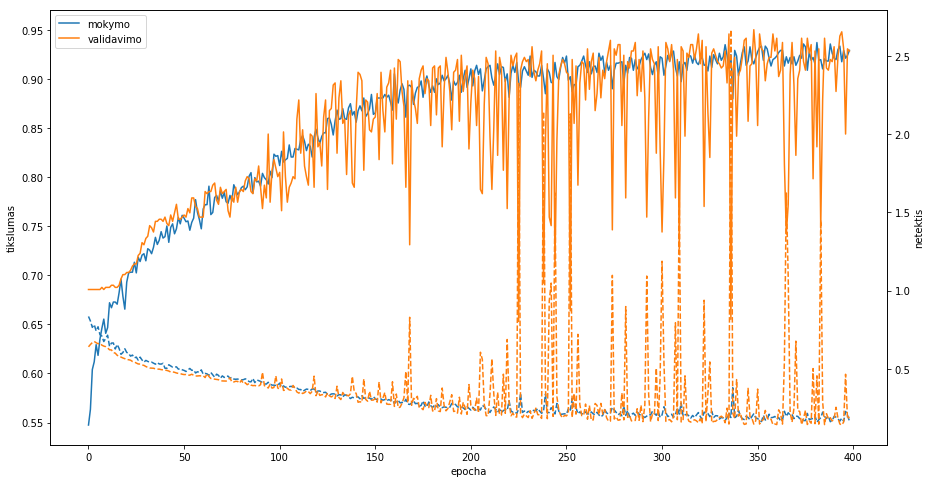

In [118]:
for train_index, test_index in gfold.split(X, Y, G):
    
    pid = G[test_index][0]
    print("PID:", pid,"TRAIN:", len(train_index), "TEST:", len(test_index))

    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # x_valid = x_test
    # y_valid = y_test
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 31)
    
    print(f"train: x={x_train.shape} y={y_train.shape}")
    print(f"valid: x={x_valid.shape} y={y_valid.shape}")
    print(f"test : x={x_test.shape}  y={y_test.shape}")
    
    model = get_model(cnn_input, cnn_output)
    
    optim = opt.SGD(lr = 0.001, decay = 1e-6, momentum = 0.5, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    es = EarlyStopping(monitor='val_acc', min_delta = 0, patience = 50, verbose = 1, 
                       restore_best_weights = True)
    
    log = model.fit(x_train, y_train, batch_size = batch_size, epochs = 1000, 
          verbose = 2, validation_data=(x_valid, y_valid), callbacks = [ es ])
    
    result = model.evaluate(x_test, y_test)
    print('Testing:')
    print('\n'.join('{} = {}'.format(*k) for k in zip(model.metrics_names, result)))
    
    plt.rcParams['figure.figsize'] = (15, 8)

    plt.plot(log.history['acc'], label = 'mokymo')
    plt.plot(log.history['val_acc'], label = 'validavimo')
    plt.ylabel('tikslumas')
    plt.xlabel('epocha')
    plt.legend() #['mokymo', 'testavimo'])

    ax2 = plt.twinx()
    ax2.plot(log.history['loss'], '--', label = 'mokymo')
    ax2.plot(log.history['val_loss'], '--', label = 'validavimo')
    ax2.set_ylabel('netektis')
    plt.show()

    results[test_index, 1] = model.predict_classes(x_test).squeeze()
    results[test_index, 2] = model.predict(x_test).squeeze()
    

In [119]:
accuracy_score(Y, results[:,1])

0.618970189701897

In [120]:
confusion_matrix(Y, results[:,1])

array([[1034,  240],
       [ 463,  108]])

In [121]:
f1_score(Y, results[:,1])

0.23503808487486397

In [122]:
roc_auc_score(Y, results[:,2])

0.5157343282186915

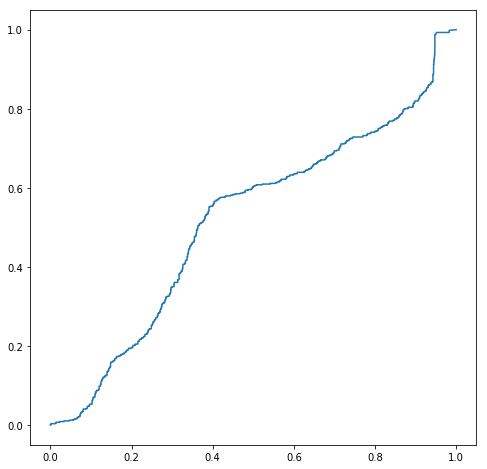

In [123]:
plt.rcParams['figure.figsize'] = (8, 8)
roc = roc_curve(Y, results[:,2])
plt.plot(roc[0],roc[1])
plt.show()

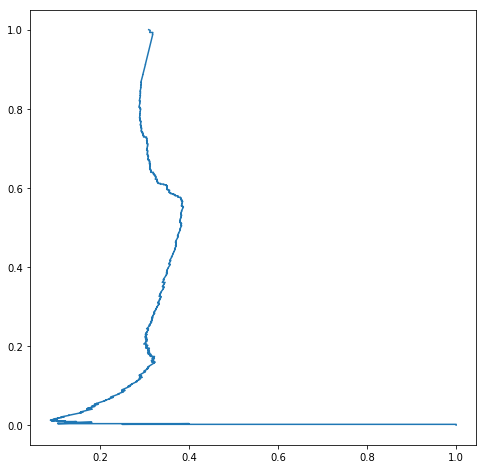

In [124]:
plt.rcParams['figure.figsize'] = (8, 8)
prc = precision_recall_curve(Y, results[:,2])
plt.plot(prc[0],prc[1])
plt.show()

In [125]:
average_precision_score(Y, results[:,2])

0.3132806320583729

In [126]:
precision_score(Y, results[:,1])

0.3103448275862069

In [127]:
recall_score(Y, results[:,1])

0.18914185639229422